In [1]:
# the purpose of this program is to parse through all the 
import math
import numpy as np
import pandas as pd
import random
import os
import json
import pprint
import tensorflow as tf
import re 
from pandas.io.json import json_normalize
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sn

from math import log
from math import sqrt
# Visualize training history

import matplotlib.pyplot as plt
import numpy
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

from sklearn import metrics
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

import statistics

In [2]:
#%%timeit
initial_path = "/data/data"
root_dir = os.listdir(initial_path)
list_of_json = []
counter_total = 0;
for dir in root_dir:
    curr_path = initial_path + "/" + dir + "/enrichment/cert_info"
    #print(curr_dir)
    if os.path.exists(curr_path):
        curr_dir = os.listdir(curr_path)
        for sub_json in curr_dir:
        #do i need the last /
            each_json = curr_path + "/" + sub_json
            print(each_json)
            ran =random.random()
            if(ran<.10):
                counter_total = counter_total+1
                #print('counter_total'+ str(counter_total))
                list_of_json.append(each_json)
    else:
        pass    
print('counter_total'+ str(counter_total))

/data/data/2019-02-23/enrichment/cert_info/5c71d8a0d276305f899a9b1d.json
/data/data/2019-02-23/enrichment/cert_info/5c71dd6a371f594929046d8f.json
/data/data/2019-02-23/enrichment/cert_info/5c71dd6b2d99fb66ca2575fa.json
/data/data/2019-02-23/enrichment/cert_info/5c71dd6c2d99fb66ca2575fb.json
/data/data/2019-02-23/enrichment/cert_info/5c71ddd7371f594929046d90.json
/data/data/2019-02-24/enrichment/cert_info/5c600d44e541220185942bfb.json
/data/data/2019-02-24/enrichment/cert_info/5c71dfac98a4a2623a8d5378.json
/data/data/2019-02-24/enrichment/cert_info/5c71dfbff481ce47ac6ff3e7.json
/data/data/2019-02-24/enrichment/cert_info/5c721dd5371f597160a6345f.json
/data/data/2019-02-24/enrichment/cert_info/5c721dd8027c1b786834fcae.json
/data/data/2019-02-24/enrichment/cert_info/5c721dd92d99fb0fe333772d.json
/data/data/2019-02-24/enrichment/cert_info/5c7221e77fdaa0372b3464fb.json
/data/data/2019-02-24/enrichment/cert_info/5c7221e7e3e366147b4955c7.json
/data/data/2019-02-24/enrichment/cert_info/5c7221eb

/data/data/2019-02-27/enrichment/cert_info/0.json
/data/data/2019-02-27/enrichment/cert_info/1.json
/data/data/2019-02-27/enrichment/cert_info/2.json
/data/data/2019-02-27/enrichment/cert_info/3.json
/data/data/2019-02-27/enrichment/cert_info/4.json
/data/data/2019-02-27/enrichment/cert_info/5.json
/data/data/2019-02-27/enrichment/cert_info/594ac5f2577ea418dd13ca9b.json
/data/data/2019-02-27/enrichment/cert_info/596b2b15024176099dd0c47c.json
/data/data/2019-02-27/enrichment/cert_info/5b6473d411efb049171a3006.json
/data/data/2019-02-27/enrichment/cert_info/5ba32e36b1e7e1111dfebe67.json
/data/data/2019-02-27/enrichment/cert_info/5bde8dd2f290494b9c6ab996.json
/data/data/2019-02-27/enrichment/cert_info/5c04fa9e6b72151e41bb2cd7.json
/data/data/2019-02-27/enrichment/cert_info/5c0d04d744a86c4011d39bbb.json
/data/data/2019-02-27/enrichment/cert_info/5c50703c28f3f607b9340c54.json
/data/data/2019-02-27/enrichment/cert_info/5c57fed6d7c07877338787a4.json
/data/data/2019-02-27/enrichment/cert_info/

/data/data/2019-02-28/enrichment/cert_info/5b59c6f64f6fa1342067147a.json
/data/data/2019-02-28/enrichment/cert_info/5ba32ba165de3f447181c20a.json
/data/data/2019-02-28/enrichment/cert_info/5bf3af521127e826d623cfbd.json
/data/data/2019-02-28/enrichment/cert_info/5bff6e219f70a91e15da4c99.json
/data/data/2019-02-28/enrichment/cert_info/5c3f185c1a1d2c34ae91c5fc.json
/data/data/2019-02-28/enrichment/cert_info/5c600d44e541220185942bfb.json
/data/data/2019-02-28/enrichment/cert_info/5c6e33f153d9c86bb28c4819.json
/data/data/2019-02-28/enrichment/cert_info/5c6eb288c8b7d944b94c0759.json
/data/data/2019-02-28/enrichment/cert_info/5c7541333ca97a6fc1b409a5.json
/data/data/2019-02-28/enrichment/cert_info/5c756b5c3507fd0490105c41.json
/data/data/2019-02-28/enrichment/cert_info/5c756bbbddc9b20395d6a24e.json
/data/data/2019-02-28/enrichment/cert_info/5c756c4a51988b0536ac87cb.json
/data/data/2019-02-28/enrichment/cert_info/5c756d237cdc9a0530533ddb.json
/data/data/2019-02-28/enrichment/cert_info/5c756d55

/data/data/2019-03-01/enrichment/cert_info/0.json
/data/data/2019-03-01/enrichment/cert_info/1.json
/data/data/2019-03-01/enrichment/cert_info/2.json
/data/data/2019-03-01/enrichment/cert_info/3.json
/data/data/2019-03-01/enrichment/cert_info/4.json
/data/data/2019-03-01/enrichment/cert_info/5.json
/data/data/2019-03-01/enrichment/cert_info/5b1fb980fd90803bf0ef6b56.json
/data/data/2019-03-01/enrichment/cert_info/5b7d1f9773a5857b953654be.json
/data/data/2019-03-01/enrichment/cert_info/5b966ba736cda367bbdf3c60.json
/data/data/2019-03-01/enrichment/cert_info/5b990eeb5f6d0e0e419ad5b4.json
/data/data/2019-03-01/enrichment/cert_info/5b9bb3e865de3f71691d3c68.json
/data/data/2019-03-01/enrichment/cert_info/5ba63ec949779d77bdc1e802.json
/data/data/2019-03-01/enrichment/cert_info/5ba78d7465de3f629ef0fa8b.json
/data/data/2019-03-01/enrichment/cert_info/5bab8288920a874d42950c19.json
/data/data/2019-03-01/enrichment/cert_info/5bbcb1535db965022b3ea5db.json
/data/data/2019-03-01/enrichment/cert_info/

/data/data/2019-03-02/enrichment/cert_info/0.json
/data/data/2019-03-02/enrichment/cert_info/1.json
/data/data/2019-03-02/enrichment/cert_info/2.json
/data/data/2019-03-02/enrichment/cert_info/3.json
/data/data/2019-03-02/enrichment/cert_info/4.json
/data/data/2019-03-02/enrichment/cert_info/5.json
/data/data/2019-03-02/enrichment/cert_info/55bb83ae67db8c6f0af587a4.json
/data/data/2019-03-02/enrichment/cert_info/5b0412cbf95d7c21e058b883.json
/data/data/2019-03-02/enrichment/cert_info/5b06ab7fe3016507076d8377.json
/data/data/2019-03-02/enrichment/cert_info/5b0e955cc9b84828db2119c8.json
/data/data/2019-03-02/enrichment/cert_info/5b4203ef9dccd206c5a71a82.json
/data/data/2019-03-02/enrichment/cert_info/5b7c07b0be535f1656801c8c.json
/data/data/2019-03-02/enrichment/cert_info/5b8a90a678e9e66563ec1453.json
/data/data/2019-03-02/enrichment/cert_info/5b93cd0d00a703734f3027d7.json
/data/data/2019-03-02/enrichment/cert_info/5b966b737e0f3372026cf110.json
/data/data/2019-03-02/enrichment/cert_info/

/data/data/2019-03-03/enrichment/cert_info/0.json
/data/data/2019-03-03/enrichment/cert_info/1.json
/data/data/2019-03-03/enrichment/cert_info/2.json
/data/data/2019-03-03/enrichment/cert_info/3.json
/data/data/2019-03-03/enrichment/cert_info/4.json
/data/data/2019-03-03/enrichment/cert_info/5.json
/data/data/2019-03-03/enrichment/cert_info/5b1c922babfd14548f28e225.json
/data/data/2019-03-03/enrichment/cert_info/5b239cdee7c37d5b86ef12b8.json
/data/data/2019-03-03/enrichment/cert_info/5c583805d7c0781958cb0839.json
/data/data/2019-03-03/enrichment/cert_info/5c6d19957668911fe42e439d.json
/data/data/2019-03-03/enrichment/cert_info/5c7567d1a65f1702dd5adb7d.json
/data/data/2019-03-03/enrichment/cert_info/5c756a23303f4604bc859f6c.json
/data/data/2019-03-03/enrichment/cert_info/5c756b543507fd03c20cabfe.json
/data/data/2019-03-03/enrichment/cert_info/5c756cb6f58bea069dd99747.json
/data/data/2019-03-03/enrichment/cert_info/5c756f942e53e6072f6e7bed.json
/data/data/2019-03-03/enrichment/cert_info/

/data/data/2019-03-04/enrichment/cert_info/0.json
/data/data/2019-03-04/enrichment/cert_info/1.json
/data/data/2019-03-04/enrichment/cert_info/2.json
/data/data/2019-03-04/enrichment/cert_info/3.json
/data/data/2019-03-04/enrichment/cert_info/4.json
/data/data/2019-03-04/enrichment/cert_info/5.json
/data/data/2019-03-04/enrichment/cert_info/58740f43f0aef314191ccef9.json
/data/data/2019-03-04/enrichment/cert_info/5aeafad48098f907b67aa826.json
/data/data/2019-03-04/enrichment/cert_info/5b0aa2ac865b732c096eb21a.json
/data/data/2019-03-04/enrichment/cert_info/5b113a0a998fe42e98c077c5.json
/data/data/2019-03-04/enrichment/cert_info/5b1fb980fd90803bf0ef6b56.json
/data/data/2019-03-04/enrichment/cert_info/5b966ba736cda367bbdf3c60.json
/data/data/2019-03-04/enrichment/cert_info/5b990eeb5f6d0e0e419ad5b4.json
/data/data/2019-03-04/enrichment/cert_info/5b9bb3e865de3f71691d3c68.json
/data/data/2019-03-04/enrichment/cert_info/5ba63ec949779d77bdc1e802.json
/data/data/2019-03-04/enrichment/cert_info/

/data/data/2019-03-05/enrichment/cert_info/0.json
/data/data/2019-03-05/enrichment/cert_info/1.json
/data/data/2019-03-05/enrichment/cert_info/2.json
/data/data/2019-03-05/enrichment/cert_info/3.json
/data/data/2019-03-05/enrichment/cert_info/4.json
/data/data/2019-03-05/enrichment/cert_info/5.json
/data/data/2019-03-05/enrichment/cert_info/5b28f5aeee8b6e446a581ac0.json
/data/data/2019-03-05/enrichment/cert_info/5b3f5fcba016a76f203ac443.json
/data/data/2019-03-05/enrichment/cert_info/5b65a48189297877178782ed.json
/data/data/2019-03-05/enrichment/cert_info/5b74202a51815e3ae7e607d9.json
/data/data/2019-03-05/enrichment/cert_info/5b781ceb62be3133da3730c6.json
/data/data/2019-03-05/enrichment/cert_info/5b8a91bfefa9d164fd2500ac.json
/data/data/2019-03-05/enrichment/cert_info/5b912dae776cc379f57000e8.json
/data/data/2019-03-05/enrichment/cert_info/5b9fa8d534c73a78c417250c.json
/data/data/2019-03-05/enrichment/cert_info/5baf7d461b2853454fb8b57d.json
/data/data/2019-03-05/enrichment/cert_info/

/data/data/2019-03-06/enrichment/cert_info/0.json
/data/data/2019-03-06/enrichment/cert_info/1.json
/data/data/2019-03-06/enrichment/cert_info/2.json
/data/data/2019-03-06/enrichment/cert_info/3.json
/data/data/2019-03-06/enrichment/cert_info/4.json
/data/data/2019-03-06/enrichment/cert_info/5.json
/data/data/2019-03-06/enrichment/cert_info/5a20276904d809312074ba2a.json
/data/data/2019-03-06/enrichment/cert_info/5c54565672ee43146aadb5d0.json
/data/data/2019-03-06/enrichment/cert_info/5c6d2c0cd70d64283c424e7a.json
/data/data/2019-03-06/enrichment/cert_info/5c7298df99222a5a122c95ff.json
/data/data/2019-03-06/enrichment/cert_info/5c756bbbddc9b20395d6a24e.json
/data/data/2019-03-06/enrichment/cert_info/5c756c242e53e604cd1d8ccd.json
/data/data/2019-03-06/enrichment/cert_info/5c7570dc51988b0866c24214.json
/data/data/2019-03-06/enrichment/cert_info/5c758830b1f31d0fe719c984.json
/data/data/2019-03-06/enrichment/cert_info/5c75aa180fef27265e631508.json
/data/data/2019-03-06/enrichment/cert_info/

/data/data/2019-03-07/enrichment/cert_info/0.json
/data/data/2019-03-07/enrichment/cert_info/1.json
/data/data/2019-03-07/enrichment/cert_info/2.json
/data/data/2019-03-07/enrichment/cert_info/3.json
/data/data/2019-03-07/enrichment/cert_info/4.json
/data/data/2019-03-07/enrichment/cert_info/5.json
/data/data/2019-03-07/enrichment/cert_info/5bbfae7dd47a1b63daf74553.json
/data/data/2019-03-07/enrichment/cert_info/5bc7ae8c65342d5a3509fcc5.json
/data/data/2019-03-07/enrichment/cert_info/5bc90f496c26766dad1011f6.json
/data/data/2019-03-07/enrichment/cert_info/5c600d44e541220185942bfb.json
/data/data/2019-03-07/enrichment/cert_info/5c6d567baab507590f33356e.json
/data/data/2019-03-07/enrichment/cert_info/5c75695d3507fd02cb6eb8a3.json
/data/data/2019-03-07/enrichment/cert_info/5c756a081ee87a032a9f6576.json
/data/data/2019-03-07/enrichment/cert_info/5c756ae0ddc9b20443f97529.json
/data/data/2019-03-07/enrichment/cert_info/5c7572826fe820017c343b79.json
/data/data/2019-03-07/enrichment/cert_info/

/data/data/2019-03-08/enrichment/cert_info/0.json
/data/data/2019-03-08/enrichment/cert_info/1.json
/data/data/2019-03-08/enrichment/cert_info/2.json
/data/data/2019-03-08/enrichment/cert_info/3.json
/data/data/2019-03-08/enrichment/cert_info/4.json
/data/data/2019-03-08/enrichment/cert_info/5.json
/data/data/2019-03-08/enrichment/cert_info/58ebadf17c71a907e4d4b067.json
/data/data/2019-03-08/enrichment/cert_info/5a552a7949cace1271249928.json
/data/data/2019-03-08/enrichment/cert_info/5c34541ffd485c3b1636a283.json
/data/data/2019-03-08/enrichment/cert_info/5c756cb6f58bea069dd99747.json
/data/data/2019-03-08/enrichment/cert_info/5c75748225ba27026beb8edf.json
/data/data/2019-03-08/enrichment/cert_info/5c762d6525ba277cdd7e4c55.json
/data/data/2019-03-08/enrichment/cert_info/5c7637819c6c1c08b6cb71f2.json
/data/data/2019-03-08/enrichment/cert_info/5c7d79f707dffd179e3f1d99.json
/data/data/2019-03-08/enrichment/cert_info/5c7d848707dffd1d86f2d179.json
/data/data/2019-03-08/enrichment/cert_info/

/data/data/2019-03-09/enrichment/cert_info/0.json
/data/data/2019-03-09/enrichment/cert_info/1.json
/data/data/2019-03-09/enrichment/cert_info/2.json
/data/data/2019-03-09/enrichment/cert_info/3.json
/data/data/2019-03-09/enrichment/cert_info/4.json
/data/data/2019-03-09/enrichment/cert_info/5.json
/data/data/2019-03-09/enrichment/cert_info/55bb83ae67db8c6f0af587a4.json
/data/data/2019-03-09/enrichment/cert_info/5aeafad48098f907b67aa826.json
/data/data/2019-03-09/enrichment/cert_info/5b990eeb5f6d0e0e419ad5b4.json
/data/data/2019-03-09/enrichment/cert_info/5b9bb3e865de3f71691d3c68.json
/data/data/2019-03-09/enrichment/cert_info/5baf7bc1474cc24c6ec77a8c.json
/data/data/2019-03-09/enrichment/cert_info/5bcddd88fcc7814b917fbc02.json
/data/data/2019-03-09/enrichment/cert_info/5bd5ba0a7ab8b711c604dfe3.json
/data/data/2019-03-09/enrichment/cert_info/5bdb052b402adb396f564fa1.json
/data/data/2019-03-09/enrichment/cert_info/5bf6b910c03eee71dd530b11.json
/data/data/2019-03-09/enrichment/cert_info/

/data/data/2019-03-11/enrichment/cert_info/0.json
/data/data/2019-03-11/enrichment/cert_info/1.json
/data/data/2019-03-11/enrichment/cert_info/10.json
/data/data/2019-03-11/enrichment/cert_info/11.json
/data/data/2019-03-11/enrichment/cert_info/12.json
/data/data/2019-03-11/enrichment/cert_info/13.json
/data/data/2019-03-11/enrichment/cert_info/14.json
/data/data/2019-03-11/enrichment/cert_info/15.json
/data/data/2019-03-11/enrichment/cert_info/16.json
/data/data/2019-03-11/enrichment/cert_info/17.json
/data/data/2019-03-11/enrichment/cert_info/18.json
/data/data/2019-03-11/enrichment/cert_info/19.json
/data/data/2019-03-11/enrichment/cert_info/2.json
/data/data/2019-03-11/enrichment/cert_info/20.json
/data/data/2019-03-11/enrichment/cert_info/21.json
/data/data/2019-03-11/enrichment/cert_info/22.json
/data/data/2019-03-11/enrichment/cert_info/23.json
/data/data/2019-03-11/enrichment/cert_info/24.json
/data/data/2019-03-11/enrichment/cert_info/25.json
/data/data/2019-03-11/enrichment/c

/data/data/2019-03-12/enrichment/cert_info/0.json
/data/data/2019-03-12/enrichment/cert_info/1.json
/data/data/2019-03-12/enrichment/cert_info/10.json
/data/data/2019-03-12/enrichment/cert_info/11.json
/data/data/2019-03-12/enrichment/cert_info/12.json
/data/data/2019-03-12/enrichment/cert_info/13.json
/data/data/2019-03-12/enrichment/cert_info/14.json
/data/data/2019-03-12/enrichment/cert_info/15.json
/data/data/2019-03-12/enrichment/cert_info/16.json
/data/data/2019-03-12/enrichment/cert_info/17.json
/data/data/2019-03-12/enrichment/cert_info/18.json
/data/data/2019-03-12/enrichment/cert_info/19.json
/data/data/2019-03-12/enrichment/cert_info/2.json
/data/data/2019-03-12/enrichment/cert_info/20.json
/data/data/2019-03-12/enrichment/cert_info/21.json
/data/data/2019-03-12/enrichment/cert_info/22.json
/data/data/2019-03-12/enrichment/cert_info/23.json
/data/data/2019-03-12/enrichment/cert_info/24.json
/data/data/2019-03-12/enrichment/cert_info/25.json
/data/data/2019-03-12/enrichment/c

/data/data/2019-03-13/enrichment/cert_info/0.json
/data/data/2019-03-13/enrichment/cert_info/1.json
/data/data/2019-03-13/enrichment/cert_info/10.json
/data/data/2019-03-13/enrichment/cert_info/11.json
/data/data/2019-03-13/enrichment/cert_info/12.json
/data/data/2019-03-13/enrichment/cert_info/13.json
/data/data/2019-03-13/enrichment/cert_info/14.json
/data/data/2019-03-13/enrichment/cert_info/15.json
/data/data/2019-03-13/enrichment/cert_info/16.json
/data/data/2019-03-13/enrichment/cert_info/17.json
/data/data/2019-03-13/enrichment/cert_info/18.json
/data/data/2019-03-13/enrichment/cert_info/19.json
/data/data/2019-03-13/enrichment/cert_info/2.json
/data/data/2019-03-13/enrichment/cert_info/20.json
/data/data/2019-03-13/enrichment/cert_info/21.json
/data/data/2019-03-13/enrichment/cert_info/22.json
/data/data/2019-03-13/enrichment/cert_info/23.json
/data/data/2019-03-13/enrichment/cert_info/24.json
/data/data/2019-03-13/enrichment/cert_info/25.json
/data/data/2019-03-13/enrichment/c

/data/data/2019-03-14/enrichment/cert_info/0.json
/data/data/2019-03-14/enrichment/cert_info/1.json
/data/data/2019-03-14/enrichment/cert_info/10.json
/data/data/2019-03-14/enrichment/cert_info/11.json
/data/data/2019-03-14/enrichment/cert_info/12.json
/data/data/2019-03-14/enrichment/cert_info/13.json
/data/data/2019-03-14/enrichment/cert_info/14.json
/data/data/2019-03-14/enrichment/cert_info/15.json
/data/data/2019-03-14/enrichment/cert_info/16.json
/data/data/2019-03-14/enrichment/cert_info/17.json
/data/data/2019-03-14/enrichment/cert_info/18.json
/data/data/2019-03-14/enrichment/cert_info/19.json
/data/data/2019-03-14/enrichment/cert_info/2.json
/data/data/2019-03-14/enrichment/cert_info/20.json
/data/data/2019-03-14/enrichment/cert_info/21.json
/data/data/2019-03-14/enrichment/cert_info/22.json
/data/data/2019-03-14/enrichment/cert_info/23.json
/data/data/2019-03-14/enrichment/cert_info/24.json
/data/data/2019-03-14/enrichment/cert_info/25.json
/data/data/2019-03-14/enrichment/c

/data/data/2019-03-15/enrichment/cert_info/0.json
/data/data/2019-03-15/enrichment/cert_info/1.json
/data/data/2019-03-15/enrichment/cert_info/10.json
/data/data/2019-03-15/enrichment/cert_info/11.json
/data/data/2019-03-15/enrichment/cert_info/12.json
/data/data/2019-03-15/enrichment/cert_info/13.json
/data/data/2019-03-15/enrichment/cert_info/14.json
/data/data/2019-03-15/enrichment/cert_info/15.json
/data/data/2019-03-15/enrichment/cert_info/16.json
/data/data/2019-03-15/enrichment/cert_info/17.json
/data/data/2019-03-15/enrichment/cert_info/18.json
/data/data/2019-03-15/enrichment/cert_info/19.json
/data/data/2019-03-15/enrichment/cert_info/2.json
/data/data/2019-03-15/enrichment/cert_info/20.json
/data/data/2019-03-15/enrichment/cert_info/21.json
/data/data/2019-03-15/enrichment/cert_info/22.json
/data/data/2019-03-15/enrichment/cert_info/23.json
/data/data/2019-03-15/enrichment/cert_info/24.json
/data/data/2019-03-15/enrichment/cert_info/25.json
/data/data/2019-03-15/enrichment/c

/data/data/2019-03-16/enrichment/cert_info/0.json
/data/data/2019-03-16/enrichment/cert_info/1.json
/data/data/2019-03-16/enrichment/cert_info/10.json
/data/data/2019-03-16/enrichment/cert_info/11.json
/data/data/2019-03-16/enrichment/cert_info/12.json
/data/data/2019-03-16/enrichment/cert_info/13.json
/data/data/2019-03-16/enrichment/cert_info/14.json
/data/data/2019-03-16/enrichment/cert_info/15.json
/data/data/2019-03-16/enrichment/cert_info/16.json
/data/data/2019-03-16/enrichment/cert_info/17.json
/data/data/2019-03-16/enrichment/cert_info/18.json
/data/data/2019-03-16/enrichment/cert_info/19.json
/data/data/2019-03-16/enrichment/cert_info/2.json
/data/data/2019-03-16/enrichment/cert_info/20.json
/data/data/2019-03-16/enrichment/cert_info/21.json
/data/data/2019-03-16/enrichment/cert_info/22.json
/data/data/2019-03-16/enrichment/cert_info/23.json
/data/data/2019-03-16/enrichment/cert_info/24.json
/data/data/2019-03-16/enrichment/cert_info/25.json
/data/data/2019-03-16/enrichment/c

/data/data/2019-03-18/enrichment/cert_info/0.json
/data/data/2019-03-18/enrichment/cert_info/1.json
/data/data/2019-03-18/enrichment/cert_info/10.json
/data/data/2019-03-18/enrichment/cert_info/11.json
/data/data/2019-03-18/enrichment/cert_info/12.json
/data/data/2019-03-18/enrichment/cert_info/13.json
/data/data/2019-03-18/enrichment/cert_info/14.json
/data/data/2019-03-18/enrichment/cert_info/15.json
/data/data/2019-03-18/enrichment/cert_info/16.json
/data/data/2019-03-18/enrichment/cert_info/17.json
/data/data/2019-03-18/enrichment/cert_info/18.json
/data/data/2019-03-18/enrichment/cert_info/19.json
/data/data/2019-03-18/enrichment/cert_info/2.json
/data/data/2019-03-18/enrichment/cert_info/20.json
/data/data/2019-03-18/enrichment/cert_info/21.json
/data/data/2019-03-18/enrichment/cert_info/22.json
/data/data/2019-03-18/enrichment/cert_info/23.json
/data/data/2019-03-18/enrichment/cert_info/24.json
/data/data/2019-03-18/enrichment/cert_info/25.json
/data/data/2019-03-18/enrichment/c

/data/data/2019-03-19/enrichment/cert_info/0.json
/data/data/2019-03-19/enrichment/cert_info/1.json
/data/data/2019-03-19/enrichment/cert_info/10.json
/data/data/2019-03-19/enrichment/cert_info/11.json
/data/data/2019-03-19/enrichment/cert_info/12.json
/data/data/2019-03-19/enrichment/cert_info/13.json
/data/data/2019-03-19/enrichment/cert_info/14.json
/data/data/2019-03-19/enrichment/cert_info/15.json
/data/data/2019-03-19/enrichment/cert_info/16.json
/data/data/2019-03-19/enrichment/cert_info/17.json
/data/data/2019-03-19/enrichment/cert_info/18.json
/data/data/2019-03-19/enrichment/cert_info/19.json
/data/data/2019-03-19/enrichment/cert_info/2.json
/data/data/2019-03-19/enrichment/cert_info/20.json
/data/data/2019-03-19/enrichment/cert_info/21.json
/data/data/2019-03-19/enrichment/cert_info/22.json
/data/data/2019-03-19/enrichment/cert_info/23.json
/data/data/2019-03-19/enrichment/cert_info/24.json
/data/data/2019-03-19/enrichment/cert_info/25.json
/data/data/2019-03-19/enrichment/c

/data/data/2019-03-22/enrichment/cert_info/0.json
/data/data/2019-03-22/enrichment/cert_info/1.json
/data/data/2019-03-22/enrichment/cert_info/10.json
/data/data/2019-03-22/enrichment/cert_info/11.json
/data/data/2019-03-22/enrichment/cert_info/12.json
/data/data/2019-03-22/enrichment/cert_info/13.json
/data/data/2019-03-22/enrichment/cert_info/14.json
/data/data/2019-03-22/enrichment/cert_info/15.json
/data/data/2019-03-22/enrichment/cert_info/16.json
/data/data/2019-03-22/enrichment/cert_info/17.json
/data/data/2019-03-22/enrichment/cert_info/18.json
/data/data/2019-03-22/enrichment/cert_info/19.json
/data/data/2019-03-22/enrichment/cert_info/2.json
/data/data/2019-03-22/enrichment/cert_info/20.json
/data/data/2019-03-22/enrichment/cert_info/21.json
/data/data/2019-03-22/enrichment/cert_info/22.json
/data/data/2019-03-22/enrichment/cert_info/23.json
/data/data/2019-03-22/enrichment/cert_info/24.json
/data/data/2019-03-22/enrichment/cert_info/25.json
/data/data/2019-03-22/enrichment/c

/data/data/2019-03-23/enrichment/cert_info/0.json
/data/data/2019-03-23/enrichment/cert_info/1.json
/data/data/2019-03-23/enrichment/cert_info/10.json
/data/data/2019-03-23/enrichment/cert_info/11.json
/data/data/2019-03-23/enrichment/cert_info/12.json
/data/data/2019-03-23/enrichment/cert_info/13.json
/data/data/2019-03-23/enrichment/cert_info/14.json
/data/data/2019-03-23/enrichment/cert_info/15.json
/data/data/2019-03-23/enrichment/cert_info/16.json
/data/data/2019-03-23/enrichment/cert_info/17.json
/data/data/2019-03-23/enrichment/cert_info/18.json
/data/data/2019-03-23/enrichment/cert_info/19.json
/data/data/2019-03-23/enrichment/cert_info/2.json
/data/data/2019-03-23/enrichment/cert_info/20.json
/data/data/2019-03-23/enrichment/cert_info/21.json
/data/data/2019-03-23/enrichment/cert_info/22.json
/data/data/2019-03-23/enrichment/cert_info/23.json
/data/data/2019-03-23/enrichment/cert_info/24.json
/data/data/2019-03-23/enrichment/cert_info/25.json
/data/data/2019-03-23/enrichment/c

/data/data/2019-03-24/enrichment/cert_info/0.json
/data/data/2019-03-24/enrichment/cert_info/1.json
/data/data/2019-03-24/enrichment/cert_info/10.json
/data/data/2019-03-24/enrichment/cert_info/11.json
/data/data/2019-03-24/enrichment/cert_info/12.json
/data/data/2019-03-24/enrichment/cert_info/13.json
/data/data/2019-03-24/enrichment/cert_info/14.json
/data/data/2019-03-24/enrichment/cert_info/15.json
/data/data/2019-03-24/enrichment/cert_info/16.json
/data/data/2019-03-24/enrichment/cert_info/17.json
/data/data/2019-03-24/enrichment/cert_info/18.json
/data/data/2019-03-24/enrichment/cert_info/19.json
/data/data/2019-03-24/enrichment/cert_info/2.json
/data/data/2019-03-24/enrichment/cert_info/20.json
/data/data/2019-03-24/enrichment/cert_info/21.json
/data/data/2019-03-24/enrichment/cert_info/22.json
/data/data/2019-03-24/enrichment/cert_info/23.json
/data/data/2019-03-24/enrichment/cert_info/24.json
/data/data/2019-03-24/enrichment/cert_info/25.json
/data/data/2019-03-24/enrichment/c

/data/data/2019-03-25/enrichment/cert_info/0.json
/data/data/2019-03-25/enrichment/cert_info/1.json
/data/data/2019-03-25/enrichment/cert_info/10.json
/data/data/2019-03-25/enrichment/cert_info/11.json
/data/data/2019-03-25/enrichment/cert_info/12.json
/data/data/2019-03-25/enrichment/cert_info/13.json
/data/data/2019-03-25/enrichment/cert_info/14.json
/data/data/2019-03-25/enrichment/cert_info/15.json
/data/data/2019-03-25/enrichment/cert_info/16.json
/data/data/2019-03-25/enrichment/cert_info/17.json
/data/data/2019-03-25/enrichment/cert_info/18.json
/data/data/2019-03-25/enrichment/cert_info/19.json
/data/data/2019-03-25/enrichment/cert_info/2.json
/data/data/2019-03-25/enrichment/cert_info/20.json
/data/data/2019-03-25/enrichment/cert_info/21.json
/data/data/2019-03-25/enrichment/cert_info/22.json
/data/data/2019-03-25/enrichment/cert_info/23.json
/data/data/2019-03-25/enrichment/cert_info/24.json
/data/data/2019-03-25/enrichment/cert_info/25.json
/data/data/2019-03-25/enrichment/c

/data/data/2019-03-26/enrichment/cert_info/0.json
/data/data/2019-03-26/enrichment/cert_info/1.json
/data/data/2019-03-26/enrichment/cert_info/10.json
/data/data/2019-03-26/enrichment/cert_info/11.json
/data/data/2019-03-26/enrichment/cert_info/12.json
/data/data/2019-03-26/enrichment/cert_info/13.json
/data/data/2019-03-26/enrichment/cert_info/14.json
/data/data/2019-03-26/enrichment/cert_info/15.json
/data/data/2019-03-26/enrichment/cert_info/16.json
/data/data/2019-03-26/enrichment/cert_info/17.json
/data/data/2019-03-26/enrichment/cert_info/18.json
/data/data/2019-03-26/enrichment/cert_info/19.json
/data/data/2019-03-26/enrichment/cert_info/2.json
/data/data/2019-03-26/enrichment/cert_info/20.json
/data/data/2019-03-26/enrichment/cert_info/21.json
/data/data/2019-03-26/enrichment/cert_info/22.json
/data/data/2019-03-26/enrichment/cert_info/23.json
/data/data/2019-03-26/enrichment/cert_info/24.json
/data/data/2019-03-26/enrichment/cert_info/25.json
/data/data/2019-03-26/enrichment/c

/data/data/2019-03-27/enrichment/cert_info/0.json
/data/data/2019-03-27/enrichment/cert_info/1.json
/data/data/2019-03-27/enrichment/cert_info/10.json
/data/data/2019-03-27/enrichment/cert_info/11.json
/data/data/2019-03-27/enrichment/cert_info/12.json
/data/data/2019-03-27/enrichment/cert_info/13.json
/data/data/2019-03-27/enrichment/cert_info/14.json
/data/data/2019-03-27/enrichment/cert_info/15.json
/data/data/2019-03-27/enrichment/cert_info/16.json
/data/data/2019-03-27/enrichment/cert_info/17.json
/data/data/2019-03-27/enrichment/cert_info/18.json
/data/data/2019-03-27/enrichment/cert_info/19.json
/data/data/2019-03-27/enrichment/cert_info/2.json
/data/data/2019-03-27/enrichment/cert_info/20.json
/data/data/2019-03-27/enrichment/cert_info/21.json
/data/data/2019-03-27/enrichment/cert_info/22.json
/data/data/2019-03-27/enrichment/cert_info/23.json
/data/data/2019-03-27/enrichment/cert_info/24.json
/data/data/2019-03-27/enrichment/cert_info/25.json
/data/data/2019-03-27/enrichment/c

/data/data/2019-03-28/enrichment/cert_info/0.json
/data/data/2019-03-28/enrichment/cert_info/1.json
/data/data/2019-03-28/enrichment/cert_info/10.json
/data/data/2019-03-28/enrichment/cert_info/11.json
/data/data/2019-03-28/enrichment/cert_info/12.json
/data/data/2019-03-28/enrichment/cert_info/13.json
/data/data/2019-03-28/enrichment/cert_info/14.json
/data/data/2019-03-28/enrichment/cert_info/15.json
/data/data/2019-03-28/enrichment/cert_info/16.json
/data/data/2019-03-28/enrichment/cert_info/17.json
/data/data/2019-03-28/enrichment/cert_info/18.json
/data/data/2019-03-28/enrichment/cert_info/19.json
/data/data/2019-03-28/enrichment/cert_info/2.json
/data/data/2019-03-28/enrichment/cert_info/20.json
/data/data/2019-03-28/enrichment/cert_info/21.json
/data/data/2019-03-28/enrichment/cert_info/22.json
/data/data/2019-03-28/enrichment/cert_info/23.json
/data/data/2019-03-28/enrichment/cert_info/24.json
/data/data/2019-03-28/enrichment/cert_info/25.json
/data/data/2019-03-28/enrichment/c

/data/data/2019-03-29/enrichment/cert_info/0.json
/data/data/2019-03-29/enrichment/cert_info/1.json
/data/data/2019-03-29/enrichment/cert_info/10.json
/data/data/2019-03-29/enrichment/cert_info/11.json
/data/data/2019-03-29/enrichment/cert_info/12.json
/data/data/2019-03-29/enrichment/cert_info/13.json
/data/data/2019-03-29/enrichment/cert_info/14.json
/data/data/2019-03-29/enrichment/cert_info/15.json
/data/data/2019-03-29/enrichment/cert_info/16.json
/data/data/2019-03-29/enrichment/cert_info/17.json
/data/data/2019-03-29/enrichment/cert_info/18.json
/data/data/2019-03-29/enrichment/cert_info/19.json
/data/data/2019-03-29/enrichment/cert_info/2.json
/data/data/2019-03-29/enrichment/cert_info/20.json
/data/data/2019-03-29/enrichment/cert_info/21.json
/data/data/2019-03-29/enrichment/cert_info/22.json
/data/data/2019-03-29/enrichment/cert_info/23.json
/data/data/2019-03-29/enrichment/cert_info/24.json
/data/data/2019-03-29/enrichment/cert_info/25.json
/data/data/2019-03-29/enrichment/c

/data/data/2019-03-31/enrichment/cert_info/0.json
/data/data/2019-03-31/enrichment/cert_info/1.json
/data/data/2019-03-31/enrichment/cert_info/10.json
/data/data/2019-03-31/enrichment/cert_info/11.json
/data/data/2019-03-31/enrichment/cert_info/12.json
/data/data/2019-03-31/enrichment/cert_info/13.json
/data/data/2019-03-31/enrichment/cert_info/14.json
/data/data/2019-03-31/enrichment/cert_info/15.json
/data/data/2019-03-31/enrichment/cert_info/16.json
/data/data/2019-03-31/enrichment/cert_info/17.json
/data/data/2019-03-31/enrichment/cert_info/18.json
/data/data/2019-03-31/enrichment/cert_info/19.json
/data/data/2019-03-31/enrichment/cert_info/2.json
/data/data/2019-03-31/enrichment/cert_info/20.json
/data/data/2019-03-31/enrichment/cert_info/21.json
/data/data/2019-03-31/enrichment/cert_info/22.json
/data/data/2019-03-31/enrichment/cert_info/23.json
/data/data/2019-03-31/enrichment/cert_info/24.json
/data/data/2019-03-31/enrichment/cert_info/25.json
/data/data/2019-03-31/enrichment/c

/data/data/2019-04-01/enrichment/cert_info/0.json
/data/data/2019-04-01/enrichment/cert_info/1.json
/data/data/2019-04-01/enrichment/cert_info/10.json
/data/data/2019-04-01/enrichment/cert_info/11.json
/data/data/2019-04-01/enrichment/cert_info/12.json
/data/data/2019-04-01/enrichment/cert_info/13.json
/data/data/2019-04-01/enrichment/cert_info/14.json
/data/data/2019-04-01/enrichment/cert_info/15.json
/data/data/2019-04-01/enrichment/cert_info/16.json
/data/data/2019-04-01/enrichment/cert_info/17.json
/data/data/2019-04-01/enrichment/cert_info/18.json
/data/data/2019-04-01/enrichment/cert_info/19.json
/data/data/2019-04-01/enrichment/cert_info/2.json
/data/data/2019-04-01/enrichment/cert_info/20.json
/data/data/2019-04-01/enrichment/cert_info/21.json
/data/data/2019-04-01/enrichment/cert_info/22.json
/data/data/2019-04-01/enrichment/cert_info/23.json
/data/data/2019-04-01/enrichment/cert_info/24.json
/data/data/2019-04-01/enrichment/cert_info/25.json
/data/data/2019-04-01/enrichment/c

/data/data/2019-04-03/enrichment/cert_info/0.json
/data/data/2019-04-03/enrichment/cert_info/1.json
/data/data/2019-04-03/enrichment/cert_info/10.json
/data/data/2019-04-03/enrichment/cert_info/11.json
/data/data/2019-04-03/enrichment/cert_info/12.json
/data/data/2019-04-03/enrichment/cert_info/13.json
/data/data/2019-04-03/enrichment/cert_info/14.json
/data/data/2019-04-03/enrichment/cert_info/15.json
/data/data/2019-04-03/enrichment/cert_info/16.json
/data/data/2019-04-03/enrichment/cert_info/17.json
/data/data/2019-04-03/enrichment/cert_info/18.json
/data/data/2019-04-03/enrichment/cert_info/19.json
/data/data/2019-04-03/enrichment/cert_info/2.json
/data/data/2019-04-03/enrichment/cert_info/20.json
/data/data/2019-04-03/enrichment/cert_info/21.json
/data/data/2019-04-03/enrichment/cert_info/22.json
/data/data/2019-04-03/enrichment/cert_info/23.json
/data/data/2019-04-03/enrichment/cert_info/24.json
/data/data/2019-04-03/enrichment/cert_info/25.json
/data/data/2019-04-03/enrichment/c

/data/data/2019-04-04/enrichment/cert_info/0.json
/data/data/2019-04-04/enrichment/cert_info/1.json
/data/data/2019-04-04/enrichment/cert_info/10.json
/data/data/2019-04-04/enrichment/cert_info/11.json
/data/data/2019-04-04/enrichment/cert_info/12.json
/data/data/2019-04-04/enrichment/cert_info/13.json
/data/data/2019-04-04/enrichment/cert_info/14.json
/data/data/2019-04-04/enrichment/cert_info/15.json
/data/data/2019-04-04/enrichment/cert_info/16.json
/data/data/2019-04-04/enrichment/cert_info/17.json
/data/data/2019-04-04/enrichment/cert_info/18.json
/data/data/2019-04-04/enrichment/cert_info/19.json
/data/data/2019-04-04/enrichment/cert_info/2.json
/data/data/2019-04-04/enrichment/cert_info/20.json
/data/data/2019-04-04/enrichment/cert_info/21.json
/data/data/2019-04-04/enrichment/cert_info/22.json
/data/data/2019-04-04/enrichment/cert_info/23.json
/data/data/2019-04-04/enrichment/cert_info/24.json
/data/data/2019-04-04/enrichment/cert_info/25.json
/data/data/2019-04-04/enrichment/c

/data/data/2019-04-05/enrichment/cert_info/0.json
/data/data/2019-04-05/enrichment/cert_info/1.json
/data/data/2019-04-05/enrichment/cert_info/10.json
/data/data/2019-04-05/enrichment/cert_info/11.json
/data/data/2019-04-05/enrichment/cert_info/12.json
/data/data/2019-04-05/enrichment/cert_info/13.json
/data/data/2019-04-05/enrichment/cert_info/14.json
/data/data/2019-04-05/enrichment/cert_info/15.json
/data/data/2019-04-05/enrichment/cert_info/16.json
/data/data/2019-04-05/enrichment/cert_info/17.json
/data/data/2019-04-05/enrichment/cert_info/18.json
/data/data/2019-04-05/enrichment/cert_info/19.json
/data/data/2019-04-05/enrichment/cert_info/2.json
/data/data/2019-04-05/enrichment/cert_info/20.json
/data/data/2019-04-05/enrichment/cert_info/21.json
/data/data/2019-04-05/enrichment/cert_info/3.json
/data/data/2019-04-05/enrichment/cert_info/4.json
/data/data/2019-04-05/enrichment/cert_info/5.json
/data/data/2019-04-05/enrichment/cert_info/6.json
/data/data/2019-04-05/enrichment/cert_

/data/data/2019-04-08/enrichment/cert_info/0.json
/data/data/2019-04-08/enrichment/cert_info/1.json
/data/data/2019-04-08/enrichment/cert_info/10.json
/data/data/2019-04-08/enrichment/cert_info/11.json
/data/data/2019-04-08/enrichment/cert_info/12.json
/data/data/2019-04-08/enrichment/cert_info/13.json
/data/data/2019-04-08/enrichment/cert_info/14.json
/data/data/2019-04-08/enrichment/cert_info/15.json
/data/data/2019-04-08/enrichment/cert_info/16.json
/data/data/2019-04-08/enrichment/cert_info/17.json
/data/data/2019-04-08/enrichment/cert_info/18.json
/data/data/2019-04-08/enrichment/cert_info/19.json
/data/data/2019-04-08/enrichment/cert_info/2.json
/data/data/2019-04-08/enrichment/cert_info/20.json
/data/data/2019-04-08/enrichment/cert_info/21.json
/data/data/2019-04-08/enrichment/cert_info/22.json
/data/data/2019-04-08/enrichment/cert_info/23.json
/data/data/2019-04-08/enrichment/cert_info/24.json
/data/data/2019-04-08/enrichment/cert_info/25.json
/data/data/2019-04-08/enrichment/c

/data/data/2019-04-09/enrichment/cert_info/0.json
/data/data/2019-04-09/enrichment/cert_info/1.json
/data/data/2019-04-09/enrichment/cert_info/10.json
/data/data/2019-04-09/enrichment/cert_info/11.json
/data/data/2019-04-09/enrichment/cert_info/12.json
/data/data/2019-04-09/enrichment/cert_info/13.json
/data/data/2019-04-09/enrichment/cert_info/14.json
/data/data/2019-04-09/enrichment/cert_info/15.json
/data/data/2019-04-09/enrichment/cert_info/16.json
/data/data/2019-04-09/enrichment/cert_info/17.json
/data/data/2019-04-09/enrichment/cert_info/18.json
/data/data/2019-04-09/enrichment/cert_info/19.json
/data/data/2019-04-09/enrichment/cert_info/2.json
/data/data/2019-04-09/enrichment/cert_info/20.json
/data/data/2019-04-09/enrichment/cert_info/21.json
/data/data/2019-04-09/enrichment/cert_info/22.json
/data/data/2019-04-09/enrichment/cert_info/23.json
/data/data/2019-04-09/enrichment/cert_info/24.json
/data/data/2019-04-09/enrichment/cert_info/25.json
/data/data/2019-04-09/enrichment/c

/data/data/2019-04-10/enrichment/cert_info/0.json
/data/data/2019-04-10/enrichment/cert_info/1.json
/data/data/2019-04-10/enrichment/cert_info/10.json
/data/data/2019-04-10/enrichment/cert_info/11.json
/data/data/2019-04-10/enrichment/cert_info/12.json
/data/data/2019-04-10/enrichment/cert_info/13.json
/data/data/2019-04-10/enrichment/cert_info/14.json
/data/data/2019-04-10/enrichment/cert_info/15.json
/data/data/2019-04-10/enrichment/cert_info/16.json
/data/data/2019-04-10/enrichment/cert_info/17.json
/data/data/2019-04-10/enrichment/cert_info/18.json
/data/data/2019-04-10/enrichment/cert_info/19.json
/data/data/2019-04-10/enrichment/cert_info/2.json
/data/data/2019-04-10/enrichment/cert_info/20.json
/data/data/2019-04-10/enrichment/cert_info/21.json
/data/data/2019-04-10/enrichment/cert_info/22.json
/data/data/2019-04-10/enrichment/cert_info/23.json
/data/data/2019-04-10/enrichment/cert_info/24.json
/data/data/2019-04-10/enrichment/cert_info/25.json
/data/data/2019-04-10/enrichment/c

/data/data/2019-04-11/enrichment/cert_info/0.json
/data/data/2019-04-11/enrichment/cert_info/1.json
/data/data/2019-04-11/enrichment/cert_info/10.json
/data/data/2019-04-11/enrichment/cert_info/11.json
/data/data/2019-04-11/enrichment/cert_info/12.json
/data/data/2019-04-11/enrichment/cert_info/13.json
/data/data/2019-04-11/enrichment/cert_info/14.json
/data/data/2019-04-11/enrichment/cert_info/15.json
/data/data/2019-04-11/enrichment/cert_info/16.json
/data/data/2019-04-11/enrichment/cert_info/17.json
/data/data/2019-04-11/enrichment/cert_info/18.json
/data/data/2019-04-11/enrichment/cert_info/19.json
/data/data/2019-04-11/enrichment/cert_info/2.json
/data/data/2019-04-11/enrichment/cert_info/20.json
/data/data/2019-04-11/enrichment/cert_info/21.json
/data/data/2019-04-11/enrichment/cert_info/22.json
/data/data/2019-04-11/enrichment/cert_info/23.json
/data/data/2019-04-11/enrichment/cert_info/24.json
/data/data/2019-04-11/enrichment/cert_info/25.json
/data/data/2019-04-11/enrichment/c

/data/data/2019-04-12/enrichment/cert_info/0.json
/data/data/2019-04-12/enrichment/cert_info/1.json
/data/data/2019-04-12/enrichment/cert_info/10.json
/data/data/2019-04-12/enrichment/cert_info/11.json
/data/data/2019-04-12/enrichment/cert_info/12.json
/data/data/2019-04-12/enrichment/cert_info/13.json
/data/data/2019-04-12/enrichment/cert_info/14.json
/data/data/2019-04-12/enrichment/cert_info/15.json
/data/data/2019-04-12/enrichment/cert_info/16.json
/data/data/2019-04-12/enrichment/cert_info/17.json
/data/data/2019-04-12/enrichment/cert_info/18.json
/data/data/2019-04-12/enrichment/cert_info/19.json
/data/data/2019-04-12/enrichment/cert_info/2.json
/data/data/2019-04-12/enrichment/cert_info/20.json
/data/data/2019-04-12/enrichment/cert_info/21.json
/data/data/2019-04-12/enrichment/cert_info/22.json
/data/data/2019-04-12/enrichment/cert_info/23.json
/data/data/2019-04-12/enrichment/cert_info/24.json
/data/data/2019-04-12/enrichment/cert_info/25.json
/data/data/2019-04-12/enrichment/c

/data/data/2019-04-14/enrichment/cert_info/0.json
/data/data/2019-04-14/enrichment/cert_info/1.json
/data/data/2019-04-14/enrichment/cert_info/10.json
/data/data/2019-04-14/enrichment/cert_info/11.json
/data/data/2019-04-14/enrichment/cert_info/12.json
/data/data/2019-04-14/enrichment/cert_info/13.json
/data/data/2019-04-14/enrichment/cert_info/14.json
/data/data/2019-04-14/enrichment/cert_info/15.json
/data/data/2019-04-14/enrichment/cert_info/16.json
/data/data/2019-04-14/enrichment/cert_info/17.json
/data/data/2019-04-14/enrichment/cert_info/18.json
/data/data/2019-04-14/enrichment/cert_info/19.json
/data/data/2019-04-14/enrichment/cert_info/2.json
/data/data/2019-04-14/enrichment/cert_info/20.json
/data/data/2019-04-14/enrichment/cert_info/21.json
/data/data/2019-04-14/enrichment/cert_info/3.json
/data/data/2019-04-14/enrichment/cert_info/4.json
/data/data/2019-04-14/enrichment/cert_info/5.json
/data/data/2019-04-14/enrichment/cert_info/6.json
/data/data/2019-04-14/enrichment/cert_

/data/data/2019-04-17/enrichment/cert_info/0.json
/data/data/2019-04-17/enrichment/cert_info/1.json
/data/data/2019-04-17/enrichment/cert_info/10.json
/data/data/2019-04-17/enrichment/cert_info/11.json
/data/data/2019-04-17/enrichment/cert_info/12.json
/data/data/2019-04-17/enrichment/cert_info/13.json
/data/data/2019-04-17/enrichment/cert_info/14.json
/data/data/2019-04-17/enrichment/cert_info/15.json
/data/data/2019-04-17/enrichment/cert_info/16.json
/data/data/2019-04-17/enrichment/cert_info/17.json
/data/data/2019-04-17/enrichment/cert_info/18.json
/data/data/2019-04-17/enrichment/cert_info/19.json
/data/data/2019-04-17/enrichment/cert_info/2.json
/data/data/2019-04-17/enrichment/cert_info/20.json
/data/data/2019-04-17/enrichment/cert_info/21.json
/data/data/2019-04-17/enrichment/cert_info/22.json
/data/data/2019-04-17/enrichment/cert_info/23.json
/data/data/2019-04-17/enrichment/cert_info/24.json
/data/data/2019-04-17/enrichment/cert_info/25.json
/data/data/2019-04-17/enrichment/c

/data/data/2019-04-18/enrichment/cert_info/0.json
/data/data/2019-04-18/enrichment/cert_info/1.json
/data/data/2019-04-18/enrichment/cert_info/10.json
/data/data/2019-04-18/enrichment/cert_info/11.json
/data/data/2019-04-18/enrichment/cert_info/12.json
/data/data/2019-04-18/enrichment/cert_info/13.json
/data/data/2019-04-18/enrichment/cert_info/14.json
/data/data/2019-04-18/enrichment/cert_info/15.json
/data/data/2019-04-18/enrichment/cert_info/16.json
/data/data/2019-04-18/enrichment/cert_info/17.json
/data/data/2019-04-18/enrichment/cert_info/18.json
/data/data/2019-04-18/enrichment/cert_info/19.json
/data/data/2019-04-18/enrichment/cert_info/2.json
/data/data/2019-04-18/enrichment/cert_info/20.json
/data/data/2019-04-18/enrichment/cert_info/21.json
/data/data/2019-04-18/enrichment/cert_info/22.json
/data/data/2019-04-18/enrichment/cert_info/23.json
/data/data/2019-04-18/enrichment/cert_info/24.json
/data/data/2019-04-18/enrichment/cert_info/25.json
/data/data/2019-04-18/enrichment/c

/data/data/2019-04-20/enrichment/cert_info/0.json
/data/data/2019-04-20/enrichment/cert_info/1.json
/data/data/2019-04-20/enrichment/cert_info/10.json
/data/data/2019-04-20/enrichment/cert_info/11.json
/data/data/2019-04-20/enrichment/cert_info/12.json
/data/data/2019-04-20/enrichment/cert_info/13.json
/data/data/2019-04-20/enrichment/cert_info/14.json
/data/data/2019-04-20/enrichment/cert_info/15.json
/data/data/2019-04-20/enrichment/cert_info/16.json
/data/data/2019-04-20/enrichment/cert_info/17.json
/data/data/2019-04-20/enrichment/cert_info/18.json
/data/data/2019-04-20/enrichment/cert_info/19.json
/data/data/2019-04-20/enrichment/cert_info/2.json
/data/data/2019-04-20/enrichment/cert_info/20.json
/data/data/2019-04-20/enrichment/cert_info/21.json
/data/data/2019-04-20/enrichment/cert_info/22.json
/data/data/2019-04-20/enrichment/cert_info/23.json
/data/data/2019-04-20/enrichment/cert_info/24.json
/data/data/2019-04-20/enrichment/cert_info/25.json
/data/data/2019-04-20/enrichment/c

/data/data/2019-04-21/enrichment/cert_info/0.json
/data/data/2019-04-21/enrichment/cert_info/1.json
/data/data/2019-04-21/enrichment/cert_info/10.json
/data/data/2019-04-21/enrichment/cert_info/11.json
/data/data/2019-04-21/enrichment/cert_info/12.json
/data/data/2019-04-21/enrichment/cert_info/13.json
/data/data/2019-04-21/enrichment/cert_info/14.json
/data/data/2019-04-21/enrichment/cert_info/15.json
/data/data/2019-04-21/enrichment/cert_info/16.json
/data/data/2019-04-21/enrichment/cert_info/17.json
/data/data/2019-04-21/enrichment/cert_info/18.json
/data/data/2019-04-21/enrichment/cert_info/19.json
/data/data/2019-04-21/enrichment/cert_info/2.json
/data/data/2019-04-21/enrichment/cert_info/20.json
/data/data/2019-04-21/enrichment/cert_info/21.json
/data/data/2019-04-21/enrichment/cert_info/22.json
/data/data/2019-04-21/enrichment/cert_info/23.json
/data/data/2019-04-21/enrichment/cert_info/24.json
/data/data/2019-04-21/enrichment/cert_info/25.json
/data/data/2019-04-21/enrichment/c

/data/data/2019-04-22/enrichment/cert_info/0.json
/data/data/2019-04-22/enrichment/cert_info/1.json
/data/data/2019-04-22/enrichment/cert_info/10.json
/data/data/2019-04-22/enrichment/cert_info/11.json
/data/data/2019-04-22/enrichment/cert_info/12.json
/data/data/2019-04-22/enrichment/cert_info/13.json
/data/data/2019-04-22/enrichment/cert_info/14.json
/data/data/2019-04-22/enrichment/cert_info/15.json
/data/data/2019-04-22/enrichment/cert_info/16.json
/data/data/2019-04-22/enrichment/cert_info/17.json
/data/data/2019-04-22/enrichment/cert_info/18.json
/data/data/2019-04-22/enrichment/cert_info/19.json
/data/data/2019-04-22/enrichment/cert_info/2.json
/data/data/2019-04-22/enrichment/cert_info/20.json
/data/data/2019-04-22/enrichment/cert_info/21.json
/data/data/2019-04-22/enrichment/cert_info/22.json
/data/data/2019-04-22/enrichment/cert_info/23.json
/data/data/2019-04-22/enrichment/cert_info/24.json
/data/data/2019-04-22/enrichment/cert_info/25.json
/data/data/2019-04-22/enrichment/c

/data/data/2019-04-23/enrichment/cert_info/0.json
/data/data/2019-04-23/enrichment/cert_info/1.json
/data/data/2019-04-23/enrichment/cert_info/10.json
/data/data/2019-04-23/enrichment/cert_info/11.json
/data/data/2019-04-23/enrichment/cert_info/12.json
/data/data/2019-04-23/enrichment/cert_info/13.json
/data/data/2019-04-23/enrichment/cert_info/14.json
/data/data/2019-04-23/enrichment/cert_info/15.json
/data/data/2019-04-23/enrichment/cert_info/16.json
/data/data/2019-04-23/enrichment/cert_info/17.json
/data/data/2019-04-23/enrichment/cert_info/18.json
/data/data/2019-04-23/enrichment/cert_info/19.json
/data/data/2019-04-23/enrichment/cert_info/2.json
/data/data/2019-04-23/enrichment/cert_info/20.json
/data/data/2019-04-23/enrichment/cert_info/21.json
/data/data/2019-04-23/enrichment/cert_info/22.json
/data/data/2019-04-23/enrichment/cert_info/23.json
/data/data/2019-04-23/enrichment/cert_info/24.json
/data/data/2019-04-23/enrichment/cert_info/25.json
/data/data/2019-04-23/enrichment/c

/data/data/2019-04-24/enrichment/cert_info/0.json
/data/data/2019-04-24/enrichment/cert_info/1.json
/data/data/2019-04-24/enrichment/cert_info/10.json
/data/data/2019-04-24/enrichment/cert_info/11.json
/data/data/2019-04-24/enrichment/cert_info/12.json
/data/data/2019-04-24/enrichment/cert_info/13.json
/data/data/2019-04-24/enrichment/cert_info/14.json
/data/data/2019-04-24/enrichment/cert_info/15.json
/data/data/2019-04-24/enrichment/cert_info/16.json
/data/data/2019-04-24/enrichment/cert_info/17.json
/data/data/2019-04-24/enrichment/cert_info/18.json
/data/data/2019-04-24/enrichment/cert_info/19.json
/data/data/2019-04-24/enrichment/cert_info/2.json
/data/data/2019-04-24/enrichment/cert_info/20.json
/data/data/2019-04-24/enrichment/cert_info/21.json
/data/data/2019-04-24/enrichment/cert_info/22.json
/data/data/2019-04-24/enrichment/cert_info/23.json
/data/data/2019-04-24/enrichment/cert_info/24.json
/data/data/2019-04-24/enrichment/cert_info/25.json
/data/data/2019-04-24/enrichment/c

/data/data/2019-04-25/enrichment/cert_info/0.json
/data/data/2019-04-25/enrichment/cert_info/1.json
/data/data/2019-04-25/enrichment/cert_info/10.json
/data/data/2019-04-25/enrichment/cert_info/11.json
/data/data/2019-04-25/enrichment/cert_info/12.json
/data/data/2019-04-25/enrichment/cert_info/13.json
/data/data/2019-04-25/enrichment/cert_info/14.json
/data/data/2019-04-25/enrichment/cert_info/15.json
/data/data/2019-04-25/enrichment/cert_info/16.json
/data/data/2019-04-25/enrichment/cert_info/17.json
/data/data/2019-04-25/enrichment/cert_info/18.json
/data/data/2019-04-25/enrichment/cert_info/19.json
/data/data/2019-04-25/enrichment/cert_info/2.json
/data/data/2019-04-25/enrichment/cert_info/20.json
/data/data/2019-04-25/enrichment/cert_info/21.json
/data/data/2019-04-25/enrichment/cert_info/22.json
/data/data/2019-04-25/enrichment/cert_info/23.json
/data/data/2019-04-25/enrichment/cert_info/24.json
/data/data/2019-04-25/enrichment/cert_info/25.json
/data/data/2019-04-25/enrichment/c

/data/data/2019-04-26/enrichment/cert_info/0.json
/data/data/2019-04-26/enrichment/cert_info/1.json
/data/data/2019-04-26/enrichment/cert_info/10.json
/data/data/2019-04-26/enrichment/cert_info/11.json
/data/data/2019-04-26/enrichment/cert_info/12.json
/data/data/2019-04-26/enrichment/cert_info/13.json
/data/data/2019-04-26/enrichment/cert_info/14.json
/data/data/2019-04-26/enrichment/cert_info/15.json
/data/data/2019-04-26/enrichment/cert_info/16.json
/data/data/2019-04-26/enrichment/cert_info/17.json
/data/data/2019-04-26/enrichment/cert_info/18.json
/data/data/2019-04-26/enrichment/cert_info/19.json
/data/data/2019-04-26/enrichment/cert_info/2.json
/data/data/2019-04-26/enrichment/cert_info/20.json
/data/data/2019-04-26/enrichment/cert_info/21.json
/data/data/2019-04-26/enrichment/cert_info/22.json
/data/data/2019-04-26/enrichment/cert_info/23.json
/data/data/2019-04-26/enrichment/cert_info/24.json
/data/data/2019-04-26/enrichment/cert_info/25.json
/data/data/2019-04-26/enrichment/c

/data/data/2019-04-28/enrichment/cert_info/0.json
/data/data/2019-04-28/enrichment/cert_info/1.json
/data/data/2019-04-28/enrichment/cert_info/10.json
/data/data/2019-04-28/enrichment/cert_info/11.json
/data/data/2019-04-28/enrichment/cert_info/12.json
/data/data/2019-04-28/enrichment/cert_info/13.json
/data/data/2019-04-28/enrichment/cert_info/14.json
/data/data/2019-04-28/enrichment/cert_info/15.json
/data/data/2019-04-28/enrichment/cert_info/16.json
/data/data/2019-04-28/enrichment/cert_info/17.json
/data/data/2019-04-28/enrichment/cert_info/18.json
/data/data/2019-04-28/enrichment/cert_info/19.json
/data/data/2019-04-28/enrichment/cert_info/2.json
/data/data/2019-04-28/enrichment/cert_info/20.json
/data/data/2019-04-28/enrichment/cert_info/21.json
/data/data/2019-04-28/enrichment/cert_info/22.json
/data/data/2019-04-28/enrichment/cert_info/23.json
/data/data/2019-04-28/enrichment/cert_info/24.json
/data/data/2019-04-28/enrichment/cert_info/25.json
/data/data/2019-04-28/enrichment/c

/data/data/2019-04-29/enrichment/cert_info/0.json
/data/data/2019-04-29/enrichment/cert_info/1.json
/data/data/2019-04-29/enrichment/cert_info/10.json
/data/data/2019-04-29/enrichment/cert_info/11.json
/data/data/2019-04-29/enrichment/cert_info/12.json
/data/data/2019-04-29/enrichment/cert_info/13.json
/data/data/2019-04-29/enrichment/cert_info/14.json
/data/data/2019-04-29/enrichment/cert_info/15.json
/data/data/2019-04-29/enrichment/cert_info/16.json
/data/data/2019-04-29/enrichment/cert_info/17.json
/data/data/2019-04-29/enrichment/cert_info/18.json
/data/data/2019-04-29/enrichment/cert_info/19.json
/data/data/2019-04-29/enrichment/cert_info/2.json
/data/data/2019-04-29/enrichment/cert_info/20.json
/data/data/2019-04-29/enrichment/cert_info/21.json
/data/data/2019-04-29/enrichment/cert_info/22.json
/data/data/2019-04-29/enrichment/cert_info/23.json
/data/data/2019-04-29/enrichment/cert_info/24.json
/data/data/2019-04-29/enrichment/cert_info/25.json
/data/data/2019-04-29/enrichment/c

/data/data/2019-04-30/enrichment/cert_info/0.json
/data/data/2019-04-30/enrichment/cert_info/1.json
/data/data/2019-04-30/enrichment/cert_info/10.json
/data/data/2019-04-30/enrichment/cert_info/11.json
/data/data/2019-04-30/enrichment/cert_info/12.json
/data/data/2019-04-30/enrichment/cert_info/13.json
/data/data/2019-04-30/enrichment/cert_info/14.json
/data/data/2019-04-30/enrichment/cert_info/15.json
/data/data/2019-04-30/enrichment/cert_info/16.json
/data/data/2019-04-30/enrichment/cert_info/17.json
/data/data/2019-04-30/enrichment/cert_info/18.json
/data/data/2019-04-30/enrichment/cert_info/19.json
/data/data/2019-04-30/enrichment/cert_info/2.json
/data/data/2019-04-30/enrichment/cert_info/20.json
/data/data/2019-04-30/enrichment/cert_info/21.json
/data/data/2019-04-30/enrichment/cert_info/22.json
/data/data/2019-04-30/enrichment/cert_info/23.json
/data/data/2019-04-30/enrichment/cert_info/24.json
/data/data/2019-04-30/enrichment/cert_info/25.json
/data/data/2019-04-30/enrichment/c

/data/data/2019-05-01/enrichment/cert_info/0.json
/data/data/2019-05-01/enrichment/cert_info/1.json
/data/data/2019-05-01/enrichment/cert_info/10.json
/data/data/2019-05-01/enrichment/cert_info/11.json
/data/data/2019-05-01/enrichment/cert_info/12.json
/data/data/2019-05-01/enrichment/cert_info/13.json
/data/data/2019-05-01/enrichment/cert_info/14.json
/data/data/2019-05-01/enrichment/cert_info/15.json
/data/data/2019-05-01/enrichment/cert_info/16.json
/data/data/2019-05-01/enrichment/cert_info/17.json
/data/data/2019-05-01/enrichment/cert_info/18.json
/data/data/2019-05-01/enrichment/cert_info/19.json
/data/data/2019-05-01/enrichment/cert_info/2.json
/data/data/2019-05-01/enrichment/cert_info/20.json
/data/data/2019-05-01/enrichment/cert_info/21.json
/data/data/2019-05-01/enrichment/cert_info/22.json
/data/data/2019-05-01/enrichment/cert_info/23.json
/data/data/2019-05-01/enrichment/cert_info/24.json
/data/data/2019-05-01/enrichment/cert_info/25.json
/data/data/2019-05-01/enrichment/c

/data/data/2019-05-02/enrichment/cert_info/0.json
/data/data/2019-05-02/enrichment/cert_info/1.json
/data/data/2019-05-02/enrichment/cert_info/10.json
/data/data/2019-05-02/enrichment/cert_info/11.json
/data/data/2019-05-02/enrichment/cert_info/12.json
/data/data/2019-05-02/enrichment/cert_info/13.json
/data/data/2019-05-02/enrichment/cert_info/14.json
/data/data/2019-05-02/enrichment/cert_info/15.json
/data/data/2019-05-02/enrichment/cert_info/16.json
/data/data/2019-05-02/enrichment/cert_info/17.json
/data/data/2019-05-02/enrichment/cert_info/18.json
/data/data/2019-05-02/enrichment/cert_info/19.json
/data/data/2019-05-02/enrichment/cert_info/2.json
/data/data/2019-05-02/enrichment/cert_info/20.json
/data/data/2019-05-02/enrichment/cert_info/21.json
/data/data/2019-05-02/enrichment/cert_info/22.json
/data/data/2019-05-02/enrichment/cert_info/23.json
/data/data/2019-05-02/enrichment/cert_info/24.json
/data/data/2019-05-02/enrichment/cert_info/25.json
/data/data/2019-05-02/enrichment/c

/data/data/2019-05-03/enrichment/cert_info/0.json
/data/data/2019-05-03/enrichment/cert_info/1.json
/data/data/2019-05-03/enrichment/cert_info/10.json
/data/data/2019-05-03/enrichment/cert_info/11.json
/data/data/2019-05-03/enrichment/cert_info/12.json
/data/data/2019-05-03/enrichment/cert_info/13.json
/data/data/2019-05-03/enrichment/cert_info/14.json
/data/data/2019-05-03/enrichment/cert_info/15.json
/data/data/2019-05-03/enrichment/cert_info/16.json
/data/data/2019-05-03/enrichment/cert_info/17.json
/data/data/2019-05-03/enrichment/cert_info/18.json
/data/data/2019-05-03/enrichment/cert_info/19.json
/data/data/2019-05-03/enrichment/cert_info/2.json
/data/data/2019-05-03/enrichment/cert_info/20.json
/data/data/2019-05-03/enrichment/cert_info/21.json
/data/data/2019-05-03/enrichment/cert_info/22.json
/data/data/2019-05-03/enrichment/cert_info/23.json
/data/data/2019-05-03/enrichment/cert_info/24.json
/data/data/2019-05-03/enrichment/cert_info/25.json
/data/data/2019-05-03/enrichment/c

/data/data/2019-05-04/enrichment/cert_info/0.json
/data/data/2019-05-04/enrichment/cert_info/1.json
/data/data/2019-05-04/enrichment/cert_info/10.json
/data/data/2019-05-04/enrichment/cert_info/11.json
/data/data/2019-05-04/enrichment/cert_info/12.json
/data/data/2019-05-04/enrichment/cert_info/13.json
/data/data/2019-05-04/enrichment/cert_info/14.json
/data/data/2019-05-04/enrichment/cert_info/15.json
/data/data/2019-05-04/enrichment/cert_info/16.json
/data/data/2019-05-04/enrichment/cert_info/17.json
/data/data/2019-05-04/enrichment/cert_info/18.json
/data/data/2019-05-04/enrichment/cert_info/19.json
/data/data/2019-05-04/enrichment/cert_info/2.json
/data/data/2019-05-04/enrichment/cert_info/20.json
/data/data/2019-05-04/enrichment/cert_info/21.json
/data/data/2019-05-04/enrichment/cert_info/22.json
/data/data/2019-05-04/enrichment/cert_info/23.json
/data/data/2019-05-04/enrichment/cert_info/24.json
/data/data/2019-05-04/enrichment/cert_info/25.json
/data/data/2019-05-04/enrichment/c

/data/data/2019-05-05/enrichment/cert_info/0.json
/data/data/2019-05-05/enrichment/cert_info/1.json
/data/data/2019-05-05/enrichment/cert_info/10.json
/data/data/2019-05-05/enrichment/cert_info/11.json
/data/data/2019-05-05/enrichment/cert_info/12.json
/data/data/2019-05-05/enrichment/cert_info/13.json
/data/data/2019-05-05/enrichment/cert_info/14.json
/data/data/2019-05-05/enrichment/cert_info/15.json
/data/data/2019-05-05/enrichment/cert_info/16.json
/data/data/2019-05-05/enrichment/cert_info/17.json
/data/data/2019-05-05/enrichment/cert_info/18.json
/data/data/2019-05-05/enrichment/cert_info/19.json
/data/data/2019-05-05/enrichment/cert_info/2.json
/data/data/2019-05-05/enrichment/cert_info/20.json
/data/data/2019-05-05/enrichment/cert_info/21.json
/data/data/2019-05-05/enrichment/cert_info/22.json
/data/data/2019-05-05/enrichment/cert_info/23.json
/data/data/2019-05-05/enrichment/cert_info/24.json
/data/data/2019-05-05/enrichment/cert_info/25.json
/data/data/2019-05-05/enrichment/c

/data/data/2019-05-06/enrichment/cert_info/0.json
/data/data/2019-05-06/enrichment/cert_info/1.json
/data/data/2019-05-06/enrichment/cert_info/10.json
/data/data/2019-05-06/enrichment/cert_info/11.json
/data/data/2019-05-06/enrichment/cert_info/12.json
/data/data/2019-05-06/enrichment/cert_info/13.json
/data/data/2019-05-06/enrichment/cert_info/14.json
/data/data/2019-05-06/enrichment/cert_info/15.json
/data/data/2019-05-06/enrichment/cert_info/16.json
/data/data/2019-05-06/enrichment/cert_info/17.json
/data/data/2019-05-06/enrichment/cert_info/18.json
/data/data/2019-05-06/enrichment/cert_info/19.json
/data/data/2019-05-06/enrichment/cert_info/2.json
/data/data/2019-05-06/enrichment/cert_info/20.json
/data/data/2019-05-06/enrichment/cert_info/21.json
/data/data/2019-05-06/enrichment/cert_info/22.json
/data/data/2019-05-06/enrichment/cert_info/23.json
/data/data/2019-05-06/enrichment/cert_info/24.json
/data/data/2019-05-06/enrichment/cert_info/25.json
/data/data/2019-05-06/enrichment/c

/data/data/2019-05-07/enrichment/cert_info/0.json
/data/data/2019-05-07/enrichment/cert_info/1.json
/data/data/2019-05-07/enrichment/cert_info/10.json
/data/data/2019-05-07/enrichment/cert_info/11.json
/data/data/2019-05-07/enrichment/cert_info/12.json
/data/data/2019-05-07/enrichment/cert_info/13.json
/data/data/2019-05-07/enrichment/cert_info/14.json
/data/data/2019-05-07/enrichment/cert_info/15.json
/data/data/2019-05-07/enrichment/cert_info/16.json
/data/data/2019-05-07/enrichment/cert_info/17.json
/data/data/2019-05-07/enrichment/cert_info/18.json
/data/data/2019-05-07/enrichment/cert_info/19.json
/data/data/2019-05-07/enrichment/cert_info/2.json
/data/data/2019-05-07/enrichment/cert_info/20.json
/data/data/2019-05-07/enrichment/cert_info/21.json
/data/data/2019-05-07/enrichment/cert_info/22.json
/data/data/2019-05-07/enrichment/cert_info/23.json
/data/data/2019-05-07/enrichment/cert_info/24.json
/data/data/2019-05-07/enrichment/cert_info/25.json
/data/data/2019-05-07/enrichment/c

/data/data/2019-05-08/enrichment/cert_info/0.json
/data/data/2019-05-08/enrichment/cert_info/1.json
/data/data/2019-05-08/enrichment/cert_info/10.json
/data/data/2019-05-08/enrichment/cert_info/11.json
/data/data/2019-05-08/enrichment/cert_info/12.json
/data/data/2019-05-08/enrichment/cert_info/13.json
/data/data/2019-05-08/enrichment/cert_info/14.json
/data/data/2019-05-08/enrichment/cert_info/15.json
/data/data/2019-05-08/enrichment/cert_info/16.json
/data/data/2019-05-08/enrichment/cert_info/17.json
/data/data/2019-05-08/enrichment/cert_info/18.json
/data/data/2019-05-08/enrichment/cert_info/19.json
/data/data/2019-05-08/enrichment/cert_info/2.json
/data/data/2019-05-08/enrichment/cert_info/20.json
/data/data/2019-05-08/enrichment/cert_info/21.json
/data/data/2019-05-08/enrichment/cert_info/22.json
/data/data/2019-05-08/enrichment/cert_info/23.json
/data/data/2019-05-08/enrichment/cert_info/24.json
/data/data/2019-05-08/enrichment/cert_info/25.json
/data/data/2019-05-08/enrichment/c

/data/data/2019-05-09/enrichment/cert_info/0.json
/data/data/2019-05-09/enrichment/cert_info/1.json
/data/data/2019-05-09/enrichment/cert_info/10.json
/data/data/2019-05-09/enrichment/cert_info/11.json
/data/data/2019-05-09/enrichment/cert_info/12.json
/data/data/2019-05-09/enrichment/cert_info/13.json
/data/data/2019-05-09/enrichment/cert_info/14.json
/data/data/2019-05-09/enrichment/cert_info/15.json
/data/data/2019-05-09/enrichment/cert_info/16.json
/data/data/2019-05-09/enrichment/cert_info/17.json
/data/data/2019-05-09/enrichment/cert_info/18.json
/data/data/2019-05-09/enrichment/cert_info/19.json
/data/data/2019-05-09/enrichment/cert_info/2.json
/data/data/2019-05-09/enrichment/cert_info/20.json
/data/data/2019-05-09/enrichment/cert_info/21.json
/data/data/2019-05-09/enrichment/cert_info/22.json
/data/data/2019-05-09/enrichment/cert_info/23.json
/data/data/2019-05-09/enrichment/cert_info/24.json
/data/data/2019-05-09/enrichment/cert_info/25.json
/data/data/2019-05-09/enrichment/c

/data/data/2019-05-10/enrichment/cert_info/0.json
/data/data/2019-05-10/enrichment/cert_info/1.json
/data/data/2019-05-10/enrichment/cert_info/10.json
/data/data/2019-05-10/enrichment/cert_info/11.json
/data/data/2019-05-10/enrichment/cert_info/12.json
/data/data/2019-05-10/enrichment/cert_info/13.json
/data/data/2019-05-10/enrichment/cert_info/14.json
/data/data/2019-05-10/enrichment/cert_info/15.json
/data/data/2019-05-10/enrichment/cert_info/16.json
/data/data/2019-05-10/enrichment/cert_info/17.json
/data/data/2019-05-10/enrichment/cert_info/18.json
/data/data/2019-05-10/enrichment/cert_info/19.json
/data/data/2019-05-10/enrichment/cert_info/2.json
/data/data/2019-05-10/enrichment/cert_info/20.json
/data/data/2019-05-10/enrichment/cert_info/21.json
/data/data/2019-05-10/enrichment/cert_info/22.json
/data/data/2019-05-10/enrichment/cert_info/23.json
/data/data/2019-05-10/enrichment/cert_info/24.json
/data/data/2019-05-10/enrichment/cert_info/25.json
/data/data/2019-05-10/enrichment/c

/data/data/2019-05-11/enrichment/cert_info/0.json
/data/data/2019-05-11/enrichment/cert_info/1.json
/data/data/2019-05-11/enrichment/cert_info/10.json
/data/data/2019-05-11/enrichment/cert_info/11.json
/data/data/2019-05-11/enrichment/cert_info/12.json
/data/data/2019-05-11/enrichment/cert_info/13.json
/data/data/2019-05-11/enrichment/cert_info/14.json
/data/data/2019-05-11/enrichment/cert_info/15.json
/data/data/2019-05-11/enrichment/cert_info/16.json
/data/data/2019-05-11/enrichment/cert_info/17.json
/data/data/2019-05-11/enrichment/cert_info/18.json
/data/data/2019-05-11/enrichment/cert_info/19.json
/data/data/2019-05-11/enrichment/cert_info/2.json
/data/data/2019-05-11/enrichment/cert_info/20.json
/data/data/2019-05-11/enrichment/cert_info/21.json
/data/data/2019-05-11/enrichment/cert_info/22.json
/data/data/2019-05-11/enrichment/cert_info/23.json
/data/data/2019-05-11/enrichment/cert_info/24.json
/data/data/2019-05-11/enrichment/cert_info/25.json
/data/data/2019-05-11/enrichment/c

/data/data/2019-05-12/enrichment/cert_info/0.json
/data/data/2019-05-12/enrichment/cert_info/1.json
/data/data/2019-05-12/enrichment/cert_info/10.json
/data/data/2019-05-12/enrichment/cert_info/11.json
/data/data/2019-05-12/enrichment/cert_info/12.json
/data/data/2019-05-12/enrichment/cert_info/13.json
/data/data/2019-05-12/enrichment/cert_info/14.json
/data/data/2019-05-12/enrichment/cert_info/15.json
/data/data/2019-05-12/enrichment/cert_info/16.json
/data/data/2019-05-12/enrichment/cert_info/17.json
/data/data/2019-05-12/enrichment/cert_info/18.json
/data/data/2019-05-12/enrichment/cert_info/19.json
/data/data/2019-05-12/enrichment/cert_info/2.json
/data/data/2019-05-12/enrichment/cert_info/20.json
/data/data/2019-05-12/enrichment/cert_info/21.json
/data/data/2019-05-12/enrichment/cert_info/22.json
/data/data/2019-05-12/enrichment/cert_info/23.json
/data/data/2019-05-12/enrichment/cert_info/24.json
/data/data/2019-05-12/enrichment/cert_info/25.json
/data/data/2019-05-12/enrichment/c

/data/data/2019-05-20/enrichment/cert_info/0.json
/data/data/2019-05-20/enrichment/cert_info/1.json
/data/data/2019-05-20/enrichment/cert_info/10.json
/data/data/2019-05-20/enrichment/cert_info/11.json
/data/data/2019-05-20/enrichment/cert_info/12.json
/data/data/2019-05-20/enrichment/cert_info/13.json
/data/data/2019-05-20/enrichment/cert_info/14.json
/data/data/2019-05-20/enrichment/cert_info/15.json
/data/data/2019-05-20/enrichment/cert_info/16.json
/data/data/2019-05-20/enrichment/cert_info/17.json
/data/data/2019-05-20/enrichment/cert_info/18.json
/data/data/2019-05-20/enrichment/cert_info/19.json
/data/data/2019-05-20/enrichment/cert_info/2.json
/data/data/2019-05-20/enrichment/cert_info/20.json
/data/data/2019-05-20/enrichment/cert_info/21.json
/data/data/2019-05-20/enrichment/cert_info/22.json
/data/data/2019-05-20/enrichment/cert_info/23.json
/data/data/2019-05-20/enrichment/cert_info/24.json
/data/data/2019-05-20/enrichment/cert_info/25.json
/data/data/2019-05-20/enrichment/c

/data/data/2019-05-21/enrichment/cert_info/0.json
/data/data/2019-05-21/enrichment/cert_info/1.json
/data/data/2019-05-21/enrichment/cert_info/10.json
/data/data/2019-05-21/enrichment/cert_info/11.json
/data/data/2019-05-21/enrichment/cert_info/12.json
/data/data/2019-05-21/enrichment/cert_info/13.json
/data/data/2019-05-21/enrichment/cert_info/14.json
/data/data/2019-05-21/enrichment/cert_info/15.json
/data/data/2019-05-21/enrichment/cert_info/16.json
/data/data/2019-05-21/enrichment/cert_info/17.json
/data/data/2019-05-21/enrichment/cert_info/18.json
/data/data/2019-05-21/enrichment/cert_info/19.json
/data/data/2019-05-21/enrichment/cert_info/2.json
/data/data/2019-05-21/enrichment/cert_info/20.json
/data/data/2019-05-21/enrichment/cert_info/21.json
/data/data/2019-05-21/enrichment/cert_info/22.json
/data/data/2019-05-21/enrichment/cert_info/23.json
/data/data/2019-05-21/enrichment/cert_info/24.json
/data/data/2019-05-21/enrichment/cert_info/25.json
/data/data/2019-05-21/enrichment/c

/data/data/2019-05-22/enrichment/cert_info/0.json
/data/data/2019-05-22/enrichment/cert_info/1.json
/data/data/2019-05-22/enrichment/cert_info/10.json
/data/data/2019-05-22/enrichment/cert_info/11.json
/data/data/2019-05-22/enrichment/cert_info/12.json
/data/data/2019-05-22/enrichment/cert_info/13.json
/data/data/2019-05-22/enrichment/cert_info/14.json
/data/data/2019-05-22/enrichment/cert_info/15.json
/data/data/2019-05-22/enrichment/cert_info/16.json
/data/data/2019-05-22/enrichment/cert_info/17.json
/data/data/2019-05-22/enrichment/cert_info/18.json
/data/data/2019-05-22/enrichment/cert_info/19.json
/data/data/2019-05-22/enrichment/cert_info/2.json
/data/data/2019-05-22/enrichment/cert_info/20.json
/data/data/2019-05-22/enrichment/cert_info/21.json
/data/data/2019-05-22/enrichment/cert_info/22.json
/data/data/2019-05-22/enrichment/cert_info/23.json
/data/data/2019-05-22/enrichment/cert_info/24.json
/data/data/2019-05-22/enrichment/cert_info/25.json
/data/data/2019-05-22/enrichment/c

/data/data/2019-05-23/enrichment/cert_info/0.json
/data/data/2019-05-23/enrichment/cert_info/1.json
/data/data/2019-05-23/enrichment/cert_info/10.json
/data/data/2019-05-23/enrichment/cert_info/11.json
/data/data/2019-05-23/enrichment/cert_info/12.json
/data/data/2019-05-23/enrichment/cert_info/13.json
/data/data/2019-05-23/enrichment/cert_info/14.json
/data/data/2019-05-23/enrichment/cert_info/15.json
/data/data/2019-05-23/enrichment/cert_info/16.json
/data/data/2019-05-23/enrichment/cert_info/17.json
/data/data/2019-05-23/enrichment/cert_info/18.json
/data/data/2019-05-23/enrichment/cert_info/19.json
/data/data/2019-05-23/enrichment/cert_info/2.json
/data/data/2019-05-23/enrichment/cert_info/20.json
/data/data/2019-05-23/enrichment/cert_info/21.json
/data/data/2019-05-23/enrichment/cert_info/22.json
/data/data/2019-05-23/enrichment/cert_info/23.json
/data/data/2019-05-23/enrichment/cert_info/24.json
/data/data/2019-05-23/enrichment/cert_info/25.json
/data/data/2019-05-23/enrichment/c

/data/data/2019-05-24/enrichment/cert_info/0.json
/data/data/2019-05-24/enrichment/cert_info/1.json
/data/data/2019-05-24/enrichment/cert_info/10.json
/data/data/2019-05-24/enrichment/cert_info/11.json
/data/data/2019-05-24/enrichment/cert_info/12.json
/data/data/2019-05-24/enrichment/cert_info/13.json
/data/data/2019-05-24/enrichment/cert_info/14.json
/data/data/2019-05-24/enrichment/cert_info/15.json
/data/data/2019-05-24/enrichment/cert_info/16.json
/data/data/2019-05-24/enrichment/cert_info/17.json
/data/data/2019-05-24/enrichment/cert_info/18.json
/data/data/2019-05-24/enrichment/cert_info/19.json
/data/data/2019-05-24/enrichment/cert_info/2.json
/data/data/2019-05-24/enrichment/cert_info/20.json
/data/data/2019-05-24/enrichment/cert_info/21.json
/data/data/2019-05-24/enrichment/cert_info/22.json
/data/data/2019-05-24/enrichment/cert_info/23.json
/data/data/2019-05-24/enrichment/cert_info/24.json
/data/data/2019-05-24/enrichment/cert_info/25.json
/data/data/2019-05-24/enrichment/c

/data/data/2019-05-25/enrichment/cert_info/0.json
/data/data/2019-05-25/enrichment/cert_info/1.json
/data/data/2019-05-25/enrichment/cert_info/10.json
/data/data/2019-05-25/enrichment/cert_info/11.json
/data/data/2019-05-25/enrichment/cert_info/12.json
/data/data/2019-05-25/enrichment/cert_info/13.json
/data/data/2019-05-25/enrichment/cert_info/14.json
/data/data/2019-05-25/enrichment/cert_info/15.json
/data/data/2019-05-25/enrichment/cert_info/16.json
/data/data/2019-05-25/enrichment/cert_info/17.json
/data/data/2019-05-25/enrichment/cert_info/18.json
/data/data/2019-05-25/enrichment/cert_info/19.json
/data/data/2019-05-25/enrichment/cert_info/2.json
/data/data/2019-05-25/enrichment/cert_info/20.json
/data/data/2019-05-25/enrichment/cert_info/21.json
/data/data/2019-05-25/enrichment/cert_info/22.json
/data/data/2019-05-25/enrichment/cert_info/23.json
/data/data/2019-05-25/enrichment/cert_info/24.json
/data/data/2019-05-25/enrichment/cert_info/25.json
/data/data/2019-05-25/enrichment/c

/data/data/2019-05-26/enrichment/cert_info/0.json
/data/data/2019-05-26/enrichment/cert_info/1.json
/data/data/2019-05-26/enrichment/cert_info/10.json
/data/data/2019-05-26/enrichment/cert_info/11.json
/data/data/2019-05-26/enrichment/cert_info/12.json
/data/data/2019-05-26/enrichment/cert_info/13.json
/data/data/2019-05-26/enrichment/cert_info/14.json
/data/data/2019-05-26/enrichment/cert_info/15.json
/data/data/2019-05-26/enrichment/cert_info/16.json
/data/data/2019-05-26/enrichment/cert_info/17.json
/data/data/2019-05-26/enrichment/cert_info/18.json
/data/data/2019-05-26/enrichment/cert_info/19.json
/data/data/2019-05-26/enrichment/cert_info/2.json
/data/data/2019-05-26/enrichment/cert_info/20.json
/data/data/2019-05-26/enrichment/cert_info/21.json
/data/data/2019-05-26/enrichment/cert_info/22.json
/data/data/2019-05-26/enrichment/cert_info/23.json
/data/data/2019-05-26/enrichment/cert_info/24.json
/data/data/2019-05-26/enrichment/cert_info/25.json
/data/data/2019-05-26/enrichment/c

/data/data/2019-05-27/enrichment/cert_info/0.json
/data/data/2019-05-27/enrichment/cert_info/1.json
/data/data/2019-05-27/enrichment/cert_info/10.json
/data/data/2019-05-27/enrichment/cert_info/11.json
/data/data/2019-05-27/enrichment/cert_info/12.json
/data/data/2019-05-27/enrichment/cert_info/13.json
/data/data/2019-05-27/enrichment/cert_info/14.json
/data/data/2019-05-27/enrichment/cert_info/15.json
/data/data/2019-05-27/enrichment/cert_info/16.json
/data/data/2019-05-27/enrichment/cert_info/17.json
/data/data/2019-05-27/enrichment/cert_info/18.json
/data/data/2019-05-27/enrichment/cert_info/19.json
/data/data/2019-05-27/enrichment/cert_info/2.json
/data/data/2019-05-27/enrichment/cert_info/20.json
/data/data/2019-05-27/enrichment/cert_info/21.json
/data/data/2019-05-27/enrichment/cert_info/22.json
/data/data/2019-05-27/enrichment/cert_info/23.json
/data/data/2019-05-27/enrichment/cert_info/24.json
/data/data/2019-05-27/enrichment/cert_info/25.json
/data/data/2019-05-27/enrichment/c

/data/data/2019-05-28/enrichment/cert_info/0.json
/data/data/2019-05-28/enrichment/cert_info/1.json
/data/data/2019-05-28/enrichment/cert_info/10.json
/data/data/2019-05-28/enrichment/cert_info/11.json
/data/data/2019-05-28/enrichment/cert_info/12.json
/data/data/2019-05-28/enrichment/cert_info/13.json
/data/data/2019-05-28/enrichment/cert_info/14.json
/data/data/2019-05-28/enrichment/cert_info/15.json
/data/data/2019-05-28/enrichment/cert_info/16.json
/data/data/2019-05-28/enrichment/cert_info/17.json
/data/data/2019-05-28/enrichment/cert_info/18.json
/data/data/2019-05-28/enrichment/cert_info/19.json
/data/data/2019-05-28/enrichment/cert_info/2.json
/data/data/2019-05-28/enrichment/cert_info/20.json
/data/data/2019-05-28/enrichment/cert_info/21.json
/data/data/2019-05-28/enrichment/cert_info/22.json
/data/data/2019-05-28/enrichment/cert_info/23.json
/data/data/2019-05-28/enrichment/cert_info/24.json
/data/data/2019-05-28/enrichment/cert_info/25.json
/data/data/2019-05-28/enrichment/c

/data/data/2019-05-29/enrichment/cert_info/0.json
/data/data/2019-05-29/enrichment/cert_info/1.json
/data/data/2019-05-29/enrichment/cert_info/10.json
/data/data/2019-05-29/enrichment/cert_info/11.json
/data/data/2019-05-29/enrichment/cert_info/12.json
/data/data/2019-05-29/enrichment/cert_info/13.json
/data/data/2019-05-29/enrichment/cert_info/14.json
/data/data/2019-05-29/enrichment/cert_info/15.json
/data/data/2019-05-29/enrichment/cert_info/16.json
/data/data/2019-05-29/enrichment/cert_info/17.json
/data/data/2019-05-29/enrichment/cert_info/18.json
/data/data/2019-05-29/enrichment/cert_info/19.json
/data/data/2019-05-29/enrichment/cert_info/2.json
/data/data/2019-05-29/enrichment/cert_info/20.json
/data/data/2019-05-29/enrichment/cert_info/21.json
/data/data/2019-05-29/enrichment/cert_info/22.json
/data/data/2019-05-29/enrichment/cert_info/23.json
/data/data/2019-05-29/enrichment/cert_info/24.json
/data/data/2019-05-29/enrichment/cert_info/25.json
/data/data/2019-05-29/enrichment/c

/data/data/2019-05-30/enrichment/cert_info/0.json
/data/data/2019-05-30/enrichment/cert_info/1.json
/data/data/2019-05-30/enrichment/cert_info/10.json
/data/data/2019-05-30/enrichment/cert_info/11.json
/data/data/2019-05-30/enrichment/cert_info/12.json
/data/data/2019-05-30/enrichment/cert_info/13.json
/data/data/2019-05-30/enrichment/cert_info/14.json
/data/data/2019-05-30/enrichment/cert_info/15.json
/data/data/2019-05-30/enrichment/cert_info/16.json
/data/data/2019-05-30/enrichment/cert_info/17.json
/data/data/2019-05-30/enrichment/cert_info/18.json
/data/data/2019-05-30/enrichment/cert_info/19.json
/data/data/2019-05-30/enrichment/cert_info/2.json
/data/data/2019-05-30/enrichment/cert_info/20.json
/data/data/2019-05-30/enrichment/cert_info/21.json
/data/data/2019-05-30/enrichment/cert_info/22.json
/data/data/2019-05-30/enrichment/cert_info/23.json
/data/data/2019-05-30/enrichment/cert_info/24.json
/data/data/2019-05-30/enrichment/cert_info/25.json
/data/data/2019-05-30/enrichment/c

/data/data/2019-05-31/enrichment/cert_info/0.json
/data/data/2019-05-31/enrichment/cert_info/1.json
/data/data/2019-05-31/enrichment/cert_info/10.json
/data/data/2019-05-31/enrichment/cert_info/11.json
/data/data/2019-05-31/enrichment/cert_info/12.json
/data/data/2019-05-31/enrichment/cert_info/13.json
/data/data/2019-05-31/enrichment/cert_info/14.json
/data/data/2019-05-31/enrichment/cert_info/15.json
/data/data/2019-05-31/enrichment/cert_info/16.json
/data/data/2019-05-31/enrichment/cert_info/17.json
/data/data/2019-05-31/enrichment/cert_info/18.json
/data/data/2019-05-31/enrichment/cert_info/19.json
/data/data/2019-05-31/enrichment/cert_info/2.json
/data/data/2019-05-31/enrichment/cert_info/20.json
/data/data/2019-05-31/enrichment/cert_info/21.json
/data/data/2019-05-31/enrichment/cert_info/22.json
/data/data/2019-05-31/enrichment/cert_info/23.json
/data/data/2019-05-31/enrichment/cert_info/24.json
/data/data/2019-05-31/enrichment/cert_info/25.json
/data/data/2019-05-31/enrichment/c

/data/data/2019-06-01/enrichment/cert_info/0.json
/data/data/2019-06-01/enrichment/cert_info/1.json
/data/data/2019-06-01/enrichment/cert_info/10.json
/data/data/2019-06-01/enrichment/cert_info/11.json
/data/data/2019-06-01/enrichment/cert_info/12.json
/data/data/2019-06-01/enrichment/cert_info/13.json
/data/data/2019-06-01/enrichment/cert_info/14.json
/data/data/2019-06-01/enrichment/cert_info/15.json
/data/data/2019-06-01/enrichment/cert_info/16.json
/data/data/2019-06-01/enrichment/cert_info/17.json
/data/data/2019-06-01/enrichment/cert_info/18.json
/data/data/2019-06-01/enrichment/cert_info/19.json
/data/data/2019-06-01/enrichment/cert_info/2.json
/data/data/2019-06-01/enrichment/cert_info/20.json
/data/data/2019-06-01/enrichment/cert_info/21.json
/data/data/2019-06-01/enrichment/cert_info/22.json
/data/data/2019-06-01/enrichment/cert_info/23.json
/data/data/2019-06-01/enrichment/cert_info/24.json
/data/data/2019-06-01/enrichment/cert_info/25.json
/data/data/2019-06-01/enrichment/c

/data/data/2019-06-02/enrichment/cert_info/0.json
/data/data/2019-06-02/enrichment/cert_info/1.json
/data/data/2019-06-02/enrichment/cert_info/10.json
/data/data/2019-06-02/enrichment/cert_info/11.json
/data/data/2019-06-02/enrichment/cert_info/12.json
/data/data/2019-06-02/enrichment/cert_info/13.json
/data/data/2019-06-02/enrichment/cert_info/14.json
/data/data/2019-06-02/enrichment/cert_info/15.json
/data/data/2019-06-02/enrichment/cert_info/16.json
/data/data/2019-06-02/enrichment/cert_info/17.json
/data/data/2019-06-02/enrichment/cert_info/18.json
/data/data/2019-06-02/enrichment/cert_info/19.json
/data/data/2019-06-02/enrichment/cert_info/2.json
/data/data/2019-06-02/enrichment/cert_info/20.json
/data/data/2019-06-02/enrichment/cert_info/21.json
/data/data/2019-06-02/enrichment/cert_info/22.json
/data/data/2019-06-02/enrichment/cert_info/23.json
/data/data/2019-06-02/enrichment/cert_info/24.json
/data/data/2019-06-02/enrichment/cert_info/25.json
/data/data/2019-06-02/enrichment/c

/data/data/2019-06-03/enrichment/cert_info/0.json
/data/data/2019-06-03/enrichment/cert_info/1.json
/data/data/2019-06-03/enrichment/cert_info/10.json
/data/data/2019-06-03/enrichment/cert_info/11.json
/data/data/2019-06-03/enrichment/cert_info/12.json
/data/data/2019-06-03/enrichment/cert_info/13.json
/data/data/2019-06-03/enrichment/cert_info/14.json
/data/data/2019-06-03/enrichment/cert_info/15.json
/data/data/2019-06-03/enrichment/cert_info/16.json
/data/data/2019-06-03/enrichment/cert_info/17.json
/data/data/2019-06-03/enrichment/cert_info/18.json
/data/data/2019-06-03/enrichment/cert_info/19.json
/data/data/2019-06-03/enrichment/cert_info/2.json
/data/data/2019-06-03/enrichment/cert_info/20.json
/data/data/2019-06-03/enrichment/cert_info/21.json
/data/data/2019-06-03/enrichment/cert_info/22.json
/data/data/2019-06-03/enrichment/cert_info/23.json
/data/data/2019-06-03/enrichment/cert_info/24.json
/data/data/2019-06-03/enrichment/cert_info/25.json
/data/data/2019-06-03/enrichment/c

/data/data/2019-06-04/enrichment/cert_info/0.json
/data/data/2019-06-04/enrichment/cert_info/1.json
/data/data/2019-06-04/enrichment/cert_info/10.json
/data/data/2019-06-04/enrichment/cert_info/11.json
/data/data/2019-06-04/enrichment/cert_info/12.json
/data/data/2019-06-04/enrichment/cert_info/13.json
/data/data/2019-06-04/enrichment/cert_info/14.json
/data/data/2019-06-04/enrichment/cert_info/15.json
/data/data/2019-06-04/enrichment/cert_info/16.json
/data/data/2019-06-04/enrichment/cert_info/17.json
/data/data/2019-06-04/enrichment/cert_info/18.json
/data/data/2019-06-04/enrichment/cert_info/19.json
/data/data/2019-06-04/enrichment/cert_info/2.json
/data/data/2019-06-04/enrichment/cert_info/20.json
/data/data/2019-06-04/enrichment/cert_info/21.json
/data/data/2019-06-04/enrichment/cert_info/22.json
/data/data/2019-06-04/enrichment/cert_info/23.json
/data/data/2019-06-04/enrichment/cert_info/24.json
/data/data/2019-06-04/enrichment/cert_info/25.json
/data/data/2019-06-04/enrichment/c

/data/data/2019-06-05/enrichment/cert_info/0.json
/data/data/2019-06-05/enrichment/cert_info/1.json
/data/data/2019-06-05/enrichment/cert_info/10.json
/data/data/2019-06-05/enrichment/cert_info/11.json
/data/data/2019-06-05/enrichment/cert_info/12.json
/data/data/2019-06-05/enrichment/cert_info/13.json
/data/data/2019-06-05/enrichment/cert_info/14.json
/data/data/2019-06-05/enrichment/cert_info/15.json
/data/data/2019-06-05/enrichment/cert_info/16.json
/data/data/2019-06-05/enrichment/cert_info/17.json
/data/data/2019-06-05/enrichment/cert_info/18.json
/data/data/2019-06-05/enrichment/cert_info/19.json
/data/data/2019-06-05/enrichment/cert_info/2.json
/data/data/2019-06-05/enrichment/cert_info/20.json
/data/data/2019-06-05/enrichment/cert_info/21.json
/data/data/2019-06-05/enrichment/cert_info/22.json
/data/data/2019-06-05/enrichment/cert_info/23.json
/data/data/2019-06-05/enrichment/cert_info/24.json
/data/data/2019-06-05/enrichment/cert_info/25.json
/data/data/2019-06-05/enrichment/c

/data/data/2019-06-06/enrichment/cert_info/0.json
/data/data/2019-06-06/enrichment/cert_info/1.json
/data/data/2019-06-06/enrichment/cert_info/10.json
/data/data/2019-06-06/enrichment/cert_info/11.json
/data/data/2019-06-06/enrichment/cert_info/12.json
/data/data/2019-06-06/enrichment/cert_info/13.json
/data/data/2019-06-06/enrichment/cert_info/14.json
/data/data/2019-06-06/enrichment/cert_info/15.json
/data/data/2019-06-06/enrichment/cert_info/16.json
/data/data/2019-06-06/enrichment/cert_info/17.json
/data/data/2019-06-06/enrichment/cert_info/18.json
/data/data/2019-06-06/enrichment/cert_info/19.json
/data/data/2019-06-06/enrichment/cert_info/2.json
/data/data/2019-06-06/enrichment/cert_info/20.json
/data/data/2019-06-06/enrichment/cert_info/21.json
/data/data/2019-06-06/enrichment/cert_info/22.json
/data/data/2019-06-06/enrichment/cert_info/23.json
/data/data/2019-06-06/enrichment/cert_info/24.json
/data/data/2019-06-06/enrichment/cert_info/25.json
/data/data/2019-06-06/enrichment/c

/data/data/2019-06-07/enrichment/cert_info/0.json
/data/data/2019-06-07/enrichment/cert_info/1.json
/data/data/2019-06-07/enrichment/cert_info/10.json
/data/data/2019-06-07/enrichment/cert_info/11.json
/data/data/2019-06-07/enrichment/cert_info/12.json
/data/data/2019-06-07/enrichment/cert_info/13.json
/data/data/2019-06-07/enrichment/cert_info/14.json
/data/data/2019-06-07/enrichment/cert_info/15.json
/data/data/2019-06-07/enrichment/cert_info/16.json
/data/data/2019-06-07/enrichment/cert_info/17.json
/data/data/2019-06-07/enrichment/cert_info/18.json
/data/data/2019-06-07/enrichment/cert_info/19.json
/data/data/2019-06-07/enrichment/cert_info/2.json
/data/data/2019-06-07/enrichment/cert_info/20.json
/data/data/2019-06-07/enrichment/cert_info/21.json
/data/data/2019-06-07/enrichment/cert_info/22.json
/data/data/2019-06-07/enrichment/cert_info/23.json
/data/data/2019-06-07/enrichment/cert_info/24.json
/data/data/2019-06-07/enrichment/cert_info/25.json
/data/data/2019-06-07/enrichment/c

/data/data/2019-06-08/enrichment/cert_info/0.json
/data/data/2019-06-08/enrichment/cert_info/1.json
/data/data/2019-06-08/enrichment/cert_info/10.json
/data/data/2019-06-08/enrichment/cert_info/11.json
/data/data/2019-06-08/enrichment/cert_info/12.json
/data/data/2019-06-08/enrichment/cert_info/13.json
/data/data/2019-06-08/enrichment/cert_info/14.json
/data/data/2019-06-08/enrichment/cert_info/15.json
/data/data/2019-06-08/enrichment/cert_info/16.json
/data/data/2019-06-08/enrichment/cert_info/17.json
/data/data/2019-06-08/enrichment/cert_info/18.json
/data/data/2019-06-08/enrichment/cert_info/19.json
/data/data/2019-06-08/enrichment/cert_info/2.json
/data/data/2019-06-08/enrichment/cert_info/20.json
/data/data/2019-06-08/enrichment/cert_info/21.json
/data/data/2019-06-08/enrichment/cert_info/22.json
/data/data/2019-06-08/enrichment/cert_info/23.json
/data/data/2019-06-08/enrichment/cert_info/24.json
/data/data/2019-06-08/enrichment/cert_info/25.json
/data/data/2019-06-08/enrichment/c

/data/data/2019-06-09/enrichment/cert_info/0.json
/data/data/2019-06-09/enrichment/cert_info/1.json
/data/data/2019-06-09/enrichment/cert_info/10.json
/data/data/2019-06-09/enrichment/cert_info/11.json
/data/data/2019-06-09/enrichment/cert_info/12.json
/data/data/2019-06-09/enrichment/cert_info/13.json
/data/data/2019-06-09/enrichment/cert_info/14.json
/data/data/2019-06-09/enrichment/cert_info/15.json
/data/data/2019-06-09/enrichment/cert_info/16.json
/data/data/2019-06-09/enrichment/cert_info/17.json
/data/data/2019-06-09/enrichment/cert_info/18.json
/data/data/2019-06-09/enrichment/cert_info/19.json
/data/data/2019-06-09/enrichment/cert_info/2.json
/data/data/2019-06-09/enrichment/cert_info/20.json
/data/data/2019-06-09/enrichment/cert_info/21.json
/data/data/2019-06-09/enrichment/cert_info/22.json
/data/data/2019-06-09/enrichment/cert_info/23.json
/data/data/2019-06-09/enrichment/cert_info/24.json
/data/data/2019-06-09/enrichment/cert_info/25.json
/data/data/2019-06-09/enrichment/c

/data/data/2019-06-10/enrichment/cert_info/0.json
/data/data/2019-06-10/enrichment/cert_info/1.json
/data/data/2019-06-10/enrichment/cert_info/10.json
/data/data/2019-06-10/enrichment/cert_info/11.json
/data/data/2019-06-10/enrichment/cert_info/12.json
/data/data/2019-06-10/enrichment/cert_info/13.json
/data/data/2019-06-10/enrichment/cert_info/14.json
/data/data/2019-06-10/enrichment/cert_info/15.json
/data/data/2019-06-10/enrichment/cert_info/16.json
/data/data/2019-06-10/enrichment/cert_info/17.json
/data/data/2019-06-10/enrichment/cert_info/18.json
/data/data/2019-06-10/enrichment/cert_info/19.json
/data/data/2019-06-10/enrichment/cert_info/2.json
/data/data/2019-06-10/enrichment/cert_info/20.json
/data/data/2019-06-10/enrichment/cert_info/21.json
/data/data/2019-06-10/enrichment/cert_info/22.json
/data/data/2019-06-10/enrichment/cert_info/23.json
/data/data/2019-06-10/enrichment/cert_info/24.json
/data/data/2019-06-10/enrichment/cert_info/25.json
/data/data/2019-06-10/enrichment/c

/data/data/2019-06-11/enrichment/cert_info/0.json
/data/data/2019-06-11/enrichment/cert_info/1.json
/data/data/2019-06-11/enrichment/cert_info/10.json
/data/data/2019-06-11/enrichment/cert_info/11.json
/data/data/2019-06-11/enrichment/cert_info/12.json
/data/data/2019-06-11/enrichment/cert_info/13.json
/data/data/2019-06-11/enrichment/cert_info/14.json
/data/data/2019-06-11/enrichment/cert_info/15.json
/data/data/2019-06-11/enrichment/cert_info/16.json
/data/data/2019-06-11/enrichment/cert_info/17.json
/data/data/2019-06-11/enrichment/cert_info/18.json
/data/data/2019-06-11/enrichment/cert_info/19.json
/data/data/2019-06-11/enrichment/cert_info/2.json
/data/data/2019-06-11/enrichment/cert_info/20.json
/data/data/2019-06-11/enrichment/cert_info/21.json
/data/data/2019-06-11/enrichment/cert_info/22.json
/data/data/2019-06-11/enrichment/cert_info/23.json
/data/data/2019-06-11/enrichment/cert_info/24.json
/data/data/2019-06-11/enrichment/cert_info/25.json
/data/data/2019-06-11/enrichment/c

/data/data/2019-06-12/enrichment/cert_info/0.json
/data/data/2019-06-12/enrichment/cert_info/1.json
/data/data/2019-06-12/enrichment/cert_info/10.json
/data/data/2019-06-12/enrichment/cert_info/11.json
/data/data/2019-06-12/enrichment/cert_info/12.json
/data/data/2019-06-12/enrichment/cert_info/13.json
/data/data/2019-06-12/enrichment/cert_info/14.json
/data/data/2019-06-12/enrichment/cert_info/15.json
/data/data/2019-06-12/enrichment/cert_info/16.json
/data/data/2019-06-12/enrichment/cert_info/17.json
/data/data/2019-06-12/enrichment/cert_info/18.json
/data/data/2019-06-12/enrichment/cert_info/19.json
/data/data/2019-06-12/enrichment/cert_info/2.json
/data/data/2019-06-12/enrichment/cert_info/20.json
/data/data/2019-06-12/enrichment/cert_info/21.json
/data/data/2019-06-12/enrichment/cert_info/22.json
/data/data/2019-06-12/enrichment/cert_info/23.json
/data/data/2019-06-12/enrichment/cert_info/24.json
/data/data/2019-06-12/enrichment/cert_info/25.json
/data/data/2019-06-12/enrichment/c

/data/data/2019-06-13/enrichment/cert_info/0.json
/data/data/2019-06-13/enrichment/cert_info/1.json
/data/data/2019-06-13/enrichment/cert_info/10.json
/data/data/2019-06-13/enrichment/cert_info/11.json
/data/data/2019-06-13/enrichment/cert_info/12.json
/data/data/2019-06-13/enrichment/cert_info/13.json
/data/data/2019-06-13/enrichment/cert_info/14.json
/data/data/2019-06-13/enrichment/cert_info/15.json
/data/data/2019-06-13/enrichment/cert_info/16.json
/data/data/2019-06-13/enrichment/cert_info/17.json
/data/data/2019-06-13/enrichment/cert_info/18.json
/data/data/2019-06-13/enrichment/cert_info/19.json
/data/data/2019-06-13/enrichment/cert_info/2.json
/data/data/2019-06-13/enrichment/cert_info/20.json
/data/data/2019-06-13/enrichment/cert_info/21.json
/data/data/2019-06-13/enrichment/cert_info/22.json
/data/data/2019-06-13/enrichment/cert_info/23.json
/data/data/2019-06-13/enrichment/cert_info/24.json
/data/data/2019-06-13/enrichment/cert_info/25.json
/data/data/2019-06-13/enrichment/c

/data/data/2019-06-14/enrichment/cert_info/0.json
/data/data/2019-06-14/enrichment/cert_info/1.json
/data/data/2019-06-14/enrichment/cert_info/10.json
/data/data/2019-06-14/enrichment/cert_info/11.json
/data/data/2019-06-14/enrichment/cert_info/12.json
/data/data/2019-06-14/enrichment/cert_info/13.json
/data/data/2019-06-14/enrichment/cert_info/14.json
/data/data/2019-06-14/enrichment/cert_info/15.json
/data/data/2019-06-14/enrichment/cert_info/16.json
/data/data/2019-06-14/enrichment/cert_info/17.json
/data/data/2019-06-14/enrichment/cert_info/18.json
/data/data/2019-06-14/enrichment/cert_info/19.json
/data/data/2019-06-14/enrichment/cert_info/2.json
/data/data/2019-06-14/enrichment/cert_info/20.json
/data/data/2019-06-14/enrichment/cert_info/21.json
/data/data/2019-06-14/enrichment/cert_info/22.json
/data/data/2019-06-14/enrichment/cert_info/23.json
/data/data/2019-06-14/enrichment/cert_info/24.json
/data/data/2019-06-14/enrichment/cert_info/25.json
/data/data/2019-06-14/enrichment/c

/data/data/2019-06-15/enrichment/cert_info/0.json
/data/data/2019-06-15/enrichment/cert_info/1.json
/data/data/2019-06-15/enrichment/cert_info/10.json
/data/data/2019-06-15/enrichment/cert_info/11.json
/data/data/2019-06-15/enrichment/cert_info/12.json
/data/data/2019-06-15/enrichment/cert_info/13.json
/data/data/2019-06-15/enrichment/cert_info/14.json
/data/data/2019-06-15/enrichment/cert_info/15.json
/data/data/2019-06-15/enrichment/cert_info/16.json
/data/data/2019-06-15/enrichment/cert_info/17.json
/data/data/2019-06-15/enrichment/cert_info/18.json
/data/data/2019-06-15/enrichment/cert_info/19.json
/data/data/2019-06-15/enrichment/cert_info/2.json
/data/data/2019-06-15/enrichment/cert_info/20.json
/data/data/2019-06-15/enrichment/cert_info/21.json
/data/data/2019-06-15/enrichment/cert_info/22.json
/data/data/2019-06-15/enrichment/cert_info/23.json
/data/data/2019-06-15/enrichment/cert_info/24.json
/data/data/2019-06-15/enrichment/cert_info/25.json
/data/data/2019-06-15/enrichment/c

/data/data/2019-06-16/enrichment/cert_info/0.json
/data/data/2019-06-16/enrichment/cert_info/1.json
/data/data/2019-06-16/enrichment/cert_info/10.json
/data/data/2019-06-16/enrichment/cert_info/11.json
/data/data/2019-06-16/enrichment/cert_info/12.json
/data/data/2019-06-16/enrichment/cert_info/13.json
/data/data/2019-06-16/enrichment/cert_info/14.json
/data/data/2019-06-16/enrichment/cert_info/15.json
/data/data/2019-06-16/enrichment/cert_info/16.json
/data/data/2019-06-16/enrichment/cert_info/17.json
/data/data/2019-06-16/enrichment/cert_info/18.json
/data/data/2019-06-16/enrichment/cert_info/19.json
/data/data/2019-06-16/enrichment/cert_info/2.json
/data/data/2019-06-16/enrichment/cert_info/20.json
/data/data/2019-06-16/enrichment/cert_info/21.json
/data/data/2019-06-16/enrichment/cert_info/22.json
/data/data/2019-06-16/enrichment/cert_info/23.json
/data/data/2019-06-16/enrichment/cert_info/24.json
/data/data/2019-06-16/enrichment/cert_info/25.json
/data/data/2019-06-16/enrichment/c

/data/data/2019-06-17/enrichment/cert_info/0.json
/data/data/2019-06-17/enrichment/cert_info/1.json
/data/data/2019-06-17/enrichment/cert_info/10.json
/data/data/2019-06-17/enrichment/cert_info/11.json
/data/data/2019-06-17/enrichment/cert_info/12.json
/data/data/2019-06-17/enrichment/cert_info/13.json
/data/data/2019-06-17/enrichment/cert_info/14.json
/data/data/2019-06-17/enrichment/cert_info/15.json
/data/data/2019-06-17/enrichment/cert_info/16.json
/data/data/2019-06-17/enrichment/cert_info/17.json
/data/data/2019-06-17/enrichment/cert_info/18.json
/data/data/2019-06-17/enrichment/cert_info/19.json
/data/data/2019-06-17/enrichment/cert_info/2.json
/data/data/2019-06-17/enrichment/cert_info/20.json
/data/data/2019-06-17/enrichment/cert_info/21.json
/data/data/2019-06-17/enrichment/cert_info/22.json
/data/data/2019-06-17/enrichment/cert_info/23.json
/data/data/2019-06-17/enrichment/cert_info/24.json
/data/data/2019-06-17/enrichment/cert_info/25.json
/data/data/2019-06-17/enrichment/c

/data/data/2019-06-18/enrichment/cert_info/0.json
/data/data/2019-06-18/enrichment/cert_info/1.json
/data/data/2019-06-18/enrichment/cert_info/10.json
/data/data/2019-06-18/enrichment/cert_info/11.json
/data/data/2019-06-18/enrichment/cert_info/12.json
/data/data/2019-06-18/enrichment/cert_info/13.json
/data/data/2019-06-18/enrichment/cert_info/14.json
/data/data/2019-06-18/enrichment/cert_info/15.json
/data/data/2019-06-18/enrichment/cert_info/16.json
/data/data/2019-06-18/enrichment/cert_info/17.json
/data/data/2019-06-18/enrichment/cert_info/18.json
/data/data/2019-06-18/enrichment/cert_info/19.json
/data/data/2019-06-18/enrichment/cert_info/2.json
/data/data/2019-06-18/enrichment/cert_info/20.json
/data/data/2019-06-18/enrichment/cert_info/21.json
/data/data/2019-06-18/enrichment/cert_info/22.json
/data/data/2019-06-18/enrichment/cert_info/23.json
/data/data/2019-06-18/enrichment/cert_info/24.json
/data/data/2019-06-18/enrichment/cert_info/25.json
/data/data/2019-06-18/enrichment/c

/data/data/2019-06-19/enrichment/cert_info/0.json
/data/data/2019-06-19/enrichment/cert_info/1.json
/data/data/2019-06-19/enrichment/cert_info/10.json
/data/data/2019-06-19/enrichment/cert_info/11.json
/data/data/2019-06-19/enrichment/cert_info/12.json
/data/data/2019-06-19/enrichment/cert_info/13.json
/data/data/2019-06-19/enrichment/cert_info/14.json
/data/data/2019-06-19/enrichment/cert_info/15.json
/data/data/2019-06-19/enrichment/cert_info/16.json
/data/data/2019-06-19/enrichment/cert_info/17.json
/data/data/2019-06-19/enrichment/cert_info/18.json
/data/data/2019-06-19/enrichment/cert_info/19.json
/data/data/2019-06-19/enrichment/cert_info/2.json
/data/data/2019-06-19/enrichment/cert_info/20.json
/data/data/2019-06-19/enrichment/cert_info/21.json
/data/data/2019-06-19/enrichment/cert_info/22.json
/data/data/2019-06-19/enrichment/cert_info/23.json
/data/data/2019-06-19/enrichment/cert_info/24.json
/data/data/2019-06-19/enrichment/cert_info/25.json
/data/data/2019-06-19/enrichment/c

/data/data/2019-06-20/enrichment/cert_info/0.json
/data/data/2019-06-20/enrichment/cert_info/1.json
/data/data/2019-06-20/enrichment/cert_info/10.json
/data/data/2019-06-20/enrichment/cert_info/11.json
/data/data/2019-06-20/enrichment/cert_info/12.json
/data/data/2019-06-20/enrichment/cert_info/13.json
/data/data/2019-06-20/enrichment/cert_info/14.json
/data/data/2019-06-20/enrichment/cert_info/15.json
/data/data/2019-06-20/enrichment/cert_info/16.json
/data/data/2019-06-20/enrichment/cert_info/17.json
/data/data/2019-06-20/enrichment/cert_info/18.json
/data/data/2019-06-20/enrichment/cert_info/19.json
/data/data/2019-06-20/enrichment/cert_info/2.json
/data/data/2019-06-20/enrichment/cert_info/20.json
/data/data/2019-06-20/enrichment/cert_info/21.json
/data/data/2019-06-20/enrichment/cert_info/22.json
/data/data/2019-06-20/enrichment/cert_info/23.json
/data/data/2019-06-20/enrichment/cert_info/24.json
/data/data/2019-06-20/enrichment/cert_info/25.json
/data/data/2019-06-20/enrichment/c

/data/data/2019-06-21/enrichment/cert_info/0.json
/data/data/2019-06-21/enrichment/cert_info/1.json
/data/data/2019-06-21/enrichment/cert_info/10.json
/data/data/2019-06-21/enrichment/cert_info/11.json
/data/data/2019-06-21/enrichment/cert_info/12.json
/data/data/2019-06-21/enrichment/cert_info/13.json
/data/data/2019-06-21/enrichment/cert_info/14.json
/data/data/2019-06-21/enrichment/cert_info/15.json
/data/data/2019-06-21/enrichment/cert_info/16.json
/data/data/2019-06-21/enrichment/cert_info/17.json
/data/data/2019-06-21/enrichment/cert_info/18.json
/data/data/2019-06-21/enrichment/cert_info/19.json
/data/data/2019-06-21/enrichment/cert_info/2.json
/data/data/2019-06-21/enrichment/cert_info/20.json
/data/data/2019-06-21/enrichment/cert_info/21.json
/data/data/2019-06-21/enrichment/cert_info/22.json
/data/data/2019-06-21/enrichment/cert_info/23.json
/data/data/2019-06-21/enrichment/cert_info/24.json
/data/data/2019-06-21/enrichment/cert_info/25.json
/data/data/2019-06-21/enrichment/c

/data/data/2019-06-22/enrichment/cert_info/0.json
/data/data/2019-06-22/enrichment/cert_info/1.json
/data/data/2019-06-22/enrichment/cert_info/10.json
/data/data/2019-06-22/enrichment/cert_info/11.json
/data/data/2019-06-22/enrichment/cert_info/12.json
/data/data/2019-06-22/enrichment/cert_info/13.json
/data/data/2019-06-22/enrichment/cert_info/14.json
/data/data/2019-06-22/enrichment/cert_info/15.json
/data/data/2019-06-22/enrichment/cert_info/16.json
/data/data/2019-06-22/enrichment/cert_info/17.json
/data/data/2019-06-22/enrichment/cert_info/18.json
/data/data/2019-06-22/enrichment/cert_info/19.json
/data/data/2019-06-22/enrichment/cert_info/2.json
/data/data/2019-06-22/enrichment/cert_info/20.json
/data/data/2019-06-22/enrichment/cert_info/21.json
/data/data/2019-06-22/enrichment/cert_info/22.json
/data/data/2019-06-22/enrichment/cert_info/23.json
/data/data/2019-06-22/enrichment/cert_info/24.json
/data/data/2019-06-22/enrichment/cert_info/25.json
/data/data/2019-06-22/enrichment/c

/data/data/2019-06-23/enrichment/cert_info/0.json
/data/data/2019-06-23/enrichment/cert_info/1.json
/data/data/2019-06-23/enrichment/cert_info/10.json
/data/data/2019-06-23/enrichment/cert_info/11.json
/data/data/2019-06-23/enrichment/cert_info/12.json
/data/data/2019-06-23/enrichment/cert_info/13.json
/data/data/2019-06-23/enrichment/cert_info/14.json
/data/data/2019-06-23/enrichment/cert_info/15.json
/data/data/2019-06-23/enrichment/cert_info/16.json
/data/data/2019-06-23/enrichment/cert_info/17.json
/data/data/2019-06-23/enrichment/cert_info/18.json
/data/data/2019-06-23/enrichment/cert_info/19.json
/data/data/2019-06-23/enrichment/cert_info/2.json
/data/data/2019-06-23/enrichment/cert_info/20.json
/data/data/2019-06-23/enrichment/cert_info/21.json
/data/data/2019-06-23/enrichment/cert_info/22.json
/data/data/2019-06-23/enrichment/cert_info/23.json
/data/data/2019-06-23/enrichment/cert_info/24.json
/data/data/2019-06-23/enrichment/cert_info/25.json
/data/data/2019-06-23/enrichment/c

/data/data/2019-06-25/enrichment/cert_info/0.json
/data/data/2019-06-25/enrichment/cert_info/1.json
/data/data/2019-06-25/enrichment/cert_info/10.json
/data/data/2019-06-25/enrichment/cert_info/11.json
/data/data/2019-06-25/enrichment/cert_info/12.json
/data/data/2019-06-25/enrichment/cert_info/13.json
/data/data/2019-06-25/enrichment/cert_info/14.json
/data/data/2019-06-25/enrichment/cert_info/15.json
/data/data/2019-06-25/enrichment/cert_info/16.json
/data/data/2019-06-25/enrichment/cert_info/17.json
/data/data/2019-06-25/enrichment/cert_info/18.json
/data/data/2019-06-25/enrichment/cert_info/19.json
/data/data/2019-06-25/enrichment/cert_info/2.json
/data/data/2019-06-25/enrichment/cert_info/20.json
/data/data/2019-06-25/enrichment/cert_info/21.json
/data/data/2019-06-25/enrichment/cert_info/22.json
/data/data/2019-06-25/enrichment/cert_info/23.json
/data/data/2019-06-25/enrichment/cert_info/24.json
/data/data/2019-06-25/enrichment/cert_info/25.json
/data/data/2019-06-25/enrichment/c

/data/data/2019-06-26/enrichment/cert_info/0.json
/data/data/2019-06-26/enrichment/cert_info/1.json
/data/data/2019-06-26/enrichment/cert_info/10.json
/data/data/2019-06-26/enrichment/cert_info/11.json
/data/data/2019-06-26/enrichment/cert_info/12.json
/data/data/2019-06-26/enrichment/cert_info/13.json
/data/data/2019-06-26/enrichment/cert_info/14.json
/data/data/2019-06-26/enrichment/cert_info/15.json
/data/data/2019-06-26/enrichment/cert_info/16.json
/data/data/2019-06-26/enrichment/cert_info/17.json
/data/data/2019-06-26/enrichment/cert_info/18.json
/data/data/2019-06-26/enrichment/cert_info/19.json
/data/data/2019-06-26/enrichment/cert_info/2.json
/data/data/2019-06-26/enrichment/cert_info/20.json
/data/data/2019-06-26/enrichment/cert_info/21.json
/data/data/2019-06-26/enrichment/cert_info/22.json
/data/data/2019-06-26/enrichment/cert_info/23.json
/data/data/2019-06-26/enrichment/cert_info/24.json
/data/data/2019-06-26/enrichment/cert_info/25.json
/data/data/2019-06-26/enrichment/c

/data/data/2019-06-27/enrichment/cert_info/0.json
/data/data/2019-06-27/enrichment/cert_info/1.json
/data/data/2019-06-27/enrichment/cert_info/10.json
/data/data/2019-06-27/enrichment/cert_info/11.json
/data/data/2019-06-27/enrichment/cert_info/12.json
/data/data/2019-06-27/enrichment/cert_info/13.json
/data/data/2019-06-27/enrichment/cert_info/14.json
/data/data/2019-06-27/enrichment/cert_info/15.json
/data/data/2019-06-27/enrichment/cert_info/16.json
/data/data/2019-06-27/enrichment/cert_info/17.json
/data/data/2019-06-27/enrichment/cert_info/18.json
/data/data/2019-06-27/enrichment/cert_info/19.json
/data/data/2019-06-27/enrichment/cert_info/2.json
/data/data/2019-06-27/enrichment/cert_info/20.json
/data/data/2019-06-27/enrichment/cert_info/21.json
/data/data/2019-06-27/enrichment/cert_info/22.json
/data/data/2019-06-27/enrichment/cert_info/23.json
/data/data/2019-06-27/enrichment/cert_info/24.json
/data/data/2019-06-27/enrichment/cert_info/25.json
/data/data/2019-06-27/enrichment/c

/data/data/2019-06-28/enrichment/cert_info/0.json
/data/data/2019-06-28/enrichment/cert_info/1.json
/data/data/2019-06-28/enrichment/cert_info/10.json
/data/data/2019-06-28/enrichment/cert_info/11.json
/data/data/2019-06-28/enrichment/cert_info/12.json
/data/data/2019-06-28/enrichment/cert_info/13.json
/data/data/2019-06-28/enrichment/cert_info/14.json
/data/data/2019-06-28/enrichment/cert_info/15.json
/data/data/2019-06-28/enrichment/cert_info/16.json
/data/data/2019-06-28/enrichment/cert_info/17.json
/data/data/2019-06-28/enrichment/cert_info/18.json
/data/data/2019-06-28/enrichment/cert_info/19.json
/data/data/2019-06-28/enrichment/cert_info/2.json
/data/data/2019-06-28/enrichment/cert_info/20.json
/data/data/2019-06-28/enrichment/cert_info/21.json
/data/data/2019-06-28/enrichment/cert_info/22.json
/data/data/2019-06-28/enrichment/cert_info/23.json
/data/data/2019-06-28/enrichment/cert_info/24.json
/data/data/2019-06-28/enrichment/cert_info/25.json
/data/data/2019-06-28/enrichment/c

/data/data/2019-06-29/enrichment/cert_info/0.json
/data/data/2019-06-29/enrichment/cert_info/1.json
/data/data/2019-06-29/enrichment/cert_info/10.json
/data/data/2019-06-29/enrichment/cert_info/11.json
/data/data/2019-06-29/enrichment/cert_info/12.json
/data/data/2019-06-29/enrichment/cert_info/13.json
/data/data/2019-06-29/enrichment/cert_info/14.json
/data/data/2019-06-29/enrichment/cert_info/15.json
/data/data/2019-06-29/enrichment/cert_info/16.json
/data/data/2019-06-29/enrichment/cert_info/17.json
/data/data/2019-06-29/enrichment/cert_info/18.json
/data/data/2019-06-29/enrichment/cert_info/19.json
/data/data/2019-06-29/enrichment/cert_info/2.json
/data/data/2019-06-29/enrichment/cert_info/20.json
/data/data/2019-06-29/enrichment/cert_info/21.json
/data/data/2019-06-29/enrichment/cert_info/22.json
/data/data/2019-06-29/enrichment/cert_info/23.json
/data/data/2019-06-29/enrichment/cert_info/24.json
/data/data/2019-06-29/enrichment/cert_info/25.json
/data/data/2019-06-29/enrichment/c

/data/data/2019-06-30/enrichment/cert_info/0.json
/data/data/2019-06-30/enrichment/cert_info/1.json
/data/data/2019-06-30/enrichment/cert_info/10.json
/data/data/2019-06-30/enrichment/cert_info/11.json
/data/data/2019-06-30/enrichment/cert_info/12.json
/data/data/2019-06-30/enrichment/cert_info/13.json
/data/data/2019-06-30/enrichment/cert_info/14.json
/data/data/2019-06-30/enrichment/cert_info/15.json
/data/data/2019-06-30/enrichment/cert_info/16.json
/data/data/2019-06-30/enrichment/cert_info/17.json
/data/data/2019-06-30/enrichment/cert_info/18.json
/data/data/2019-06-30/enrichment/cert_info/19.json
/data/data/2019-06-30/enrichment/cert_info/2.json
/data/data/2019-06-30/enrichment/cert_info/20.json
/data/data/2019-06-30/enrichment/cert_info/21.json
/data/data/2019-06-30/enrichment/cert_info/22.json
/data/data/2019-06-30/enrichment/cert_info/23.json
/data/data/2019-06-30/enrichment/cert_info/24.json
/data/data/2019-06-30/enrichment/cert_info/25.json
/data/data/2019-06-30/enrichment/c

/data/data/2019-07-01/enrichment/cert_info/0.json
/data/data/2019-07-01/enrichment/cert_info/1.json
/data/data/2019-07-01/enrichment/cert_info/10.json
/data/data/2019-07-01/enrichment/cert_info/11.json
/data/data/2019-07-01/enrichment/cert_info/12.json
/data/data/2019-07-01/enrichment/cert_info/13.json
/data/data/2019-07-01/enrichment/cert_info/14.json
/data/data/2019-07-01/enrichment/cert_info/15.json
/data/data/2019-07-01/enrichment/cert_info/16.json
/data/data/2019-07-01/enrichment/cert_info/17.json
/data/data/2019-07-01/enrichment/cert_info/18.json
/data/data/2019-07-01/enrichment/cert_info/19.json
/data/data/2019-07-01/enrichment/cert_info/2.json
/data/data/2019-07-01/enrichment/cert_info/20.json
/data/data/2019-07-01/enrichment/cert_info/21.json
/data/data/2019-07-01/enrichment/cert_info/22.json
/data/data/2019-07-01/enrichment/cert_info/23.json
/data/data/2019-07-01/enrichment/cert_info/24.json
/data/data/2019-07-01/enrichment/cert_info/25.json
/data/data/2019-07-01/enrichment/c

/data/data/2019-07-02/enrichment/cert_info/0.json
/data/data/2019-07-02/enrichment/cert_info/1.json
/data/data/2019-07-02/enrichment/cert_info/10.json
/data/data/2019-07-02/enrichment/cert_info/11.json
/data/data/2019-07-02/enrichment/cert_info/12.json
/data/data/2019-07-02/enrichment/cert_info/13.json
/data/data/2019-07-02/enrichment/cert_info/14.json
/data/data/2019-07-02/enrichment/cert_info/15.json
/data/data/2019-07-02/enrichment/cert_info/16.json
/data/data/2019-07-02/enrichment/cert_info/17.json
/data/data/2019-07-02/enrichment/cert_info/18.json
/data/data/2019-07-02/enrichment/cert_info/19.json
/data/data/2019-07-02/enrichment/cert_info/2.json
/data/data/2019-07-02/enrichment/cert_info/20.json
/data/data/2019-07-02/enrichment/cert_info/21.json
/data/data/2019-07-02/enrichment/cert_info/22.json
/data/data/2019-07-02/enrichment/cert_info/23.json
/data/data/2019-07-02/enrichment/cert_info/24.json
/data/data/2019-07-02/enrichment/cert_info/25.json
/data/data/2019-07-02/enrichment/c

/data/data/2019-07-03/enrichment/cert_info/0.json
/data/data/2019-07-03/enrichment/cert_info/1.json
/data/data/2019-07-03/enrichment/cert_info/10.json
/data/data/2019-07-03/enrichment/cert_info/11.json
/data/data/2019-07-03/enrichment/cert_info/12.json
/data/data/2019-07-03/enrichment/cert_info/13.json
/data/data/2019-07-03/enrichment/cert_info/14.json
/data/data/2019-07-03/enrichment/cert_info/15.json
/data/data/2019-07-03/enrichment/cert_info/16.json
/data/data/2019-07-03/enrichment/cert_info/17.json
/data/data/2019-07-03/enrichment/cert_info/18.json
/data/data/2019-07-03/enrichment/cert_info/19.json
/data/data/2019-07-03/enrichment/cert_info/2.json
/data/data/2019-07-03/enrichment/cert_info/20.json
/data/data/2019-07-03/enrichment/cert_info/21.json
/data/data/2019-07-03/enrichment/cert_info/22.json
/data/data/2019-07-03/enrichment/cert_info/23.json
/data/data/2019-07-03/enrichment/cert_info/24.json
/data/data/2019-07-03/enrichment/cert_info/25.json
/data/data/2019-07-03/enrichment/c

/data/data/2019-07-04/enrichment/cert_info/0.json
/data/data/2019-07-04/enrichment/cert_info/1.json
/data/data/2019-07-04/enrichment/cert_info/10.json
/data/data/2019-07-04/enrichment/cert_info/11.json
/data/data/2019-07-04/enrichment/cert_info/12.json
/data/data/2019-07-04/enrichment/cert_info/13.json
/data/data/2019-07-04/enrichment/cert_info/14.json
/data/data/2019-07-04/enrichment/cert_info/15.json
/data/data/2019-07-04/enrichment/cert_info/16.json
/data/data/2019-07-04/enrichment/cert_info/17.json
/data/data/2019-07-04/enrichment/cert_info/18.json
/data/data/2019-07-04/enrichment/cert_info/19.json
/data/data/2019-07-04/enrichment/cert_info/2.json
/data/data/2019-07-04/enrichment/cert_info/20.json
/data/data/2019-07-04/enrichment/cert_info/21.json
/data/data/2019-07-04/enrichment/cert_info/3.json
/data/data/2019-07-04/enrichment/cert_info/4.json
/data/data/2019-07-04/enrichment/cert_info/5.json
/data/data/2019-07-04/enrichment/cert_info/6.json
/data/data/2019-07-04/enrichment/cert_

/data/data/newNONTORbenigndata/enrichment/cert_info/0.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1.json
/data/data/newNONTORbenigndata/enrichment/cert_info/10.json
/data/data/newNONTORbenigndata/enrichment/cert_info/100.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1000.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1001.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1002.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1003.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1004.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1005.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1006.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1007.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1008.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1009.json
/data/data/newNONTORbenigndata/enrichment/cert_info/101.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1010.json
/data/data/newNONT

/data/data/newNONTORbenigndata/enrichment/cert_info/890.json
/data/data/newNONTORbenigndata/enrichment/cert_info/891.json
/data/data/newNONTORbenigndata/enrichment/cert_info/892.json
/data/data/newNONTORbenigndata/enrichment/cert_info/893.json
/data/data/newNONTORbenigndata/enrichment/cert_info/894.json
/data/data/newNONTORbenigndata/enrichment/cert_info/895.json
/data/data/newNONTORbenigndata/enrichment/cert_info/896.json
/data/data/newNONTORbenigndata/enrichment/cert_info/897.json
/data/data/newNONTORbenigndata/enrichment/cert_info/898.json
/data/data/newNONTORbenigndata/enrichment/cert_info/899.json
/data/data/newNONTORbenigndata/enrichment/cert_info/9.json
/data/data/newNONTORbenigndata/enrichment/cert_info/90.json
/data/data/newNONTORbenigndata/enrichment/cert_info/900.json
/data/data/newNONTORbenigndata/enrichment/cert_info/901.json
/data/data/newNONTORbenigndata/enrichment/cert_info/902.json
/data/data/newNONTORbenigndata/enrichment/cert_info/903.json
/data/data/newNONTORbenignd

In [15]:
print(target_function_list.count(1))
print(target_function_list.count(0))
print(target_function_list.count(1)/(target_function_list.count(1)+target_function_list.count(0)))

2272
3464
0.39609483960948394


In [3]:
data_total = []
a_df = pd.DataFrame()
target_function_list_origional_copy = []
list_of_bad_json = []
for a_json in list_of_json:
    print('Test')
    with open(''+a_json) as data_file:
        try:             
            data = json.load(data_file)
            data_frame = json_normalize(data['data'])
            print ((len(a_json)))
           # print ((len(data_frame.index)))
            if((len(a_json)<65)==True):
                ran = random.random()
                if( ran < .6):
                    print('goooooooddddd')
                    for x in range(0,len(data_frame.index),1):
                        target_function_list_origional_copy.append(1)
                    a_df = a_df.append(data_frame)
            if((len(a_json)>=65)==True):
                ran = random.random()
                if( ran < .035):
                    print('badd')
                    for x in range(0,len(data_frame.index),1):
                        target_function_list_origional_copy.append(0)             
                    a_df = a_df.append(data_frame)
            #print("target_function_list length" + len(target_function_list))

        except:
           
            list_of_bad_json.append(a_json)
            continue
print("done" )        
print(len(a_df))
 

Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test


/home/ubuntu/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
49
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
badd
Test
49
goooooooddddd
Test
49
goooooooddddd
Test
49
Test
72
Test
72
Test
72
badd
Test
72
badd
Test
72
Test
72
Test
72
Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
49
goooooooddddd
Test
49
goooooooddddd
Test
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72


50
goooooooddddd
Test
50
Test
49
Test
72
Test
72
Test
72
Test
72
Test
74
Test
74
Test
72
Test
72
Test
72
Test
74
Test
72
Test
74
Test
49
Test
50
goooooooddddd
Test
50
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
Test
49
goooooooddddd
Test
72
Test
72
Test
74
Test
72
Test
75
Test
75
Test
74
Test
72
Test
72
Test
49
goooooooddddd
Test
50
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
49
Test
50
goooooooddddd
Test
75
Test
74
Test
74
Test
74
Test
74
badd
Test
74
Test
72
Test
72
Test
72
Test
72
Test
72
Test
75
Test
74
Test
72
Test
72
Test
72
Test
91
Test
91
Test
91
Test
90
Test
50
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
Test
Test
Test
Test
Test
Test
Test
Test
Test
Test
Test
Test
72
Test
72
Test
49
goooooooddddd
Test
91
Test
91
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
Test
49
goooooooddddd
Test
72
Test
72
Test
72
Test
74
Test
72
Test
74
Test
75
Test
75
Test
74
Test
72
Test
72
Test
72
Test
72
Test
49


72
Test
72
Test
72
Test
74
Test
72
Test
72
Test
72
Test
72
Test
72
Test
49
Test
90
Test
90
badd
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
49
goooooooddddd
Test
49
goooooooddddd
Test
74
Test
72
Test
72
Test
72
Test
72
Test
74
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
91
Test
88
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
74
Test
75
Test
75
Test
75
Test
75
Test
74
Test
74
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
74
Test
74
Test
72
Test
72
Test
72
Test
72
Test
75
Test
74
Test
72
Test
72
Test
72
Test
72
Test
49
goooooooddddd
Test
90
Test
91
Test
91
Test
91
Test
91
Test
90
badd
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
Test
75
Test
74
Test
72
Test
72
Test
72
Test
72
Test
72
Test
49
goooooooddddd
Test
91
Test
91
Test
90
Test
91
Test
90
Test
90
Test
50
Test
50
goooooooddddd
Test
50
Test
50
Test
49
goooooooddddd
Test
49
goooo

In [4]:
a_df.sample(20)

,cert_info,cert_info.authorityInfoAccess,cert_info.authorityKeyIdentifier,cert_info.basicConstraints,cert_info.certificate,cert_info.certificatePolicies,cert_info.crlDistributionPoints,cert_info.ct_precert_scts,cert_info.extendedKeyUsage,cert_info.freshestCRL,...,certificate_info.subject.jurisdictionL,certificate_info.subject.jurisdictionST,certificate_info.subject.postalCode,certificate_info.subject.serialNumber,certificate_info.subject.street,certificate_info.subjectAltName,certificate_info.subjectKeyIdentifier,certificate_info.version,indicator,success
692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tatoftfortwa.ru,False
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,livedoor.com,False
31,[Errno -4] Non-recoverable failure in name res...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://securemail.avanade.com.internal-message...,False
13,[Errno -2] Name or service not known,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pushbt2.com,False
1,NaN,CA Issuers - URI:http://crt.comodoca4.com/COMO...,keyid:40:09:61:67:F0:BC:83:71:4F:DE:12:08:2C:6...,CA:FALSE,-----BEGIN CERTIFICATE-----\nMIIIazCCCBGgAwIBA...,Policy: 1.3.6.1.4.1.6449.1.2.2.7\n CPS: https...,\nFull Name:\n URI:http://crl.comodoca4.com/C...,Signed Certificate Timestamp:\n Version :...,"TLS Web Server Authentication, TLS Web Client ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,javcl.com,True
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hsaenroll.com,False
16,NaN,CA Issuers - URI:http://secure.globalsign.com/...,keyid:96:DE:61:F1:BD:1C:16:29:53:1C:C0:CC:7D:3...,CA:FALSE,-----BEGIN CERTIFICATE-----\nMIIGEDCCBPigAwIBA...,Policy: 1.3.6.1.4.1.4146.1.20\n CPS: https://...,NaN,Signed Certificate Timestamp:\n Version :...,"TLS Web Server Authentication, TLS Web Client ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blog.jp,True
9,NaN,CA Issuers - URI:http://crt.sectigo.com/Sectig...,keyid:8D:8C:5E:C4:54:AD:8A:E1:77:E9:9B:F9:9B:0...,CA:FALSE,-----BEGIN CERTIFICATE-----\nMIIF7TCCBNWgAwIBA...,Policy: 1.3.6.1.4.1.6449.1.2.2.7\n CPS: https...,NaN,Signed Certificate Timestamp:\n Version :...,"TLS Web Server Authentication, TLS Web Client ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,grid.id,True
9,[Errno -4] Non-recoverable failure in name res...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yandex.by,False
0,NaN,OCSP - URI:http://ocsp.digicert.com\nCA Issuer...,keyid:24:6E:2B:2D:D0:6A:92:51:51:25:69:01:AA:9...,CA:FALSE,-----BEGIN CERTIFICATE-----\nMIIGSzCCBTOgAwIBA...,Policy: 2.16.840.1.114412.1.1\n CPS: https://...,\nFull Name:\n URI:http://crl3.digicert.com/D...,Signed Certificate Timestamp:\n Version :...,"TLS Web Server Authentication, TLS Web Client ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,playstation.com,True


In [5]:
print(len('/data/data/newNONTORbenigndata/enrichment/cert_info/869.json'))

60


In [6]:
print('/data/data/2019-05-04/enrichment/cert_info/5cce1c6226a65d391bba9206.json')


/data/data/2019-05-04/enrichment/cert_info/5cce1c6226a65d391bba9206.json


In [7]:
print(len('/data/data/2019-06-29/enrichment/cert_info/5d17fad44f907e73acc20fef.json'))

72


In [8]:
target_function_list=target_function_list_origional_copy.copy()

In [9]:
a_df = a_df.reset_index(drop=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
print('Size is consistent?: '+str(len(a_df)==len(target_function_list)))


Size is consistent?: True


In [10]:
copy_df = a_df.copy()

In [11]:
copy_df['Benign']= target_function_list
copy_df.drop_duplicates(subset ="indicator", keep = False, inplace = True) 
target_function_list=list(copy_df['Benign'])
del copy_df['Benign']

In [13]:
def is_there_something(input):
    if(type(input)==float):
        if(math.isnan(input)==True):
            return 0
        else:
            return input
    if(input==True):
        return 1
    if(input==False):
        return 0
    if(isinstance(input,int)==True):
        return 1
    else:
        return 1
        return log(len(input)+.1)

In [14]:
for col in copy_df.columns:
    
    copy_df[''+col] = copy_df[''+col].apply(is_there_something ,'columns')

In [16]:
copy_df.sample(50)

,cert_info,cert_info.authorityInfoAccess,cert_info.authorityKeyIdentifier,cert_info.basicConstraints,cert_info.certificate,cert_info.certificatePolicies,cert_info.crlDistributionPoints,cert_info.ct_precert_scts,cert_info.extendedKeyUsage,cert_info.freshestCRL,cert_info.has_expired,cert_info.issuer.C,cert_info.issuer.CN,cert_info.issuer.DC,cert_info.issuer.L,cert_info.issuer.O,cert_info.issuer.OU,cert_info.issuer.ST,cert_info.issuer.emailAddress,cert_info.issuer.houseIdentifier,cert_info.issuer.organizationIdentifier,cert_info.issuer.postalCode,cert_info.issuer.serialNumber,cert_info.issuer.street,cert_info.issuer.subjectAltName,cert_info.issuerAltName,cert_info.keyUsage,cert_info.notAfter,cert_info.notBefore,cert_info.nsCertType,cert_info.nsComment,cert_info.serialNumber,cert_info.subject.C,cert_info.subject.CN,cert_info.subject.L,cert_info.subject.O,cert_info.subject.OU,cert_info.subject.ST,cert_info.subject.businessCategory,cert_info.subject.emailAddress,cert_info.subject.jurisdictionC,cert_info.subject.jurisdictionL,cert_info.subject.jurisdictionST,cert_info.subject.organizationIdentifier,cert_info.subject.postOfficeBox,cert_info.subject.postalCode,cert_info.subject.serialNumber,cert_info.subject.street,cert_info.subject.subjectAltName,cert_info.subjectAltName,cert_info.subjectKeyIdentifier,cert_info.version,cert_validation,certificate_info,certificate_info.authorityInfoAccess,certificate_info.authorityKeyIdentifier,certificate_info.basicConstraints,certificate_info.certificate,certificate_info.certificatePolicies,certificate_info.crlDistributionPoints,certificate_info.ct_precert_scts,certificate_info.extendedKeyUsage,certificate_info.has_expired,certificate_info.issuer.C,certificate_info.issuer.CN,certificate_info.issuer.L,certificate_info.issuer.O,certificate_info.issuer.OU,certificate_info.issuer.ST,certificate_info.issuer.emailAddress,certificate_info.issuer.postalCode,certificate_info.issuer.street,certificate_info.issuerAltName,certificate_info.keyUsage,certificate_info.notAfter,certificate_info.notBefore,certificate_info.nsCertType,certificate_info.serialNumber,certificate_info.subject.C,certificate_info.subject.CN,certificate_info.subject.L,certificate_info.subject.O,certificate_info.subject.OU,certificate_info.subject.ST,certificate_info.subject.businessCategory,certificate_info.subject.emailAddress,certificate_info.subject.jurisdictionC,certificate_info.subject.jurisdictionL,certificate_info.subject.jurisdictionST,certificate_info.subject.postalCode,certificate_info.subject.serialNumber,certificate_info.subject.street,certificate_info.subjectAltName,certificate_info.subjectKeyIdentifier,certificate_info.version,indicator,success
11254,0,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1.0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,1
12300,0,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,1
10940,0,1,1,1,1,1,1,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,1
12197,0,1,1,1,1,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,1
6263,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0
453,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0
9541,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,

In [17]:
copy_df=copy_df.drop(['cert_info.serialNumber'],1)

In [26]:
copy_df.max().max()

2.0

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
#Create a Gaussian Classifier
ranFor=RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(copy_df, target_function_list, test_size=0.3, random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
y2_score=ranFor.fit(X2_train,y2_train)
y2_pred=ranFor.predict(X2_test)

print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))

print (metrics.confusion_matrix(y2_test, y2_pred))
#print metrics.roc_auc_score(y_test, probs[:, 1])
print(metrics.classification_report(y2_test, y2_pred))

scores = cross_val_score(RandomForestClassifier(), copy_df, target_function_list, scoring='accuracy', cv=30)
print('cross val' + str(scores))
print(str(scores.mean()))

Accuracy: 0.9064497385241139
[[980  54]
 [107 580]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1034
           1       0.91      0.84      0.88       687

   micro avg       0.91      0.91      0.91      1721
   macro avg       0.91      0.90      0.90      1721
weighted avg       0.91      0.91      0.91      1721



/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-pa

cross val[0.94270833 0.88541667 0.90104167 0.9375     0.96875    0.96875
 0.9375     0.88020833 0.9375     0.97395833 0.95833333 0.95833333
 0.94270833 0.80208333 0.94764398 0.91623037 0.89528796 0.96335079
 0.92146597 0.81151832 0.67539267 0.94764398 0.83684211 0.93157895
 0.92105263 0.93684211 0.90526316 0.95263158 0.9        0.77894737]
0.9078827864272374


/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [19]:
print(len('data/data/2019-04-18/enrichment/cert_info/1.json'))

48


Feature ranking:
1. feature 5 (0.129753)
2. feature 48 (0.128178)
3. feature 49 (0.092229)
4. feature 2 (0.074779)
5. feature 1 (0.070502)
6. feature 26 (0.069581)
7. feature 11 (0.059585)
8. feature 12 (0.054955)
9. feature 32 (0.045856)
10. feature 8 (0.043419)
11. feature 15 (0.035303)
12. feature 28 (0.031952)
13. feature 4 (0.026433)
14. feature 0 (0.020154)
15. feature 50 (0.018400)
16. feature 3 (0.017336)
17. feature 52 (0.015300)
18. feature 7 (0.009798)
19. feature 27 (0.008727)
20. feature 95 (0.008402)
21. feature 6 (0.008134)
22. feature 14 (0.004676)
23. feature 36 (0.003793)
24. feature 10 (0.003504)
25. feature 31 (0.003295)
26. feature 34 (0.003088)
27. feature 18 (0.002129)
28. feature 33 (0.001686)
29. feature 16 (0.001422)
30. feature 17 (0.001412)
31. feature 35 (0.001398)
32. feature 30 (0.001004)
33. feature 38 (0.000845)
34. feature 45 (0.000769)
35. feature 44 (0.000362)
36. feature 29 (0.000345)
37. feature 37 (0.000201)
38. feature 25 (0.000194)
39. feature 1

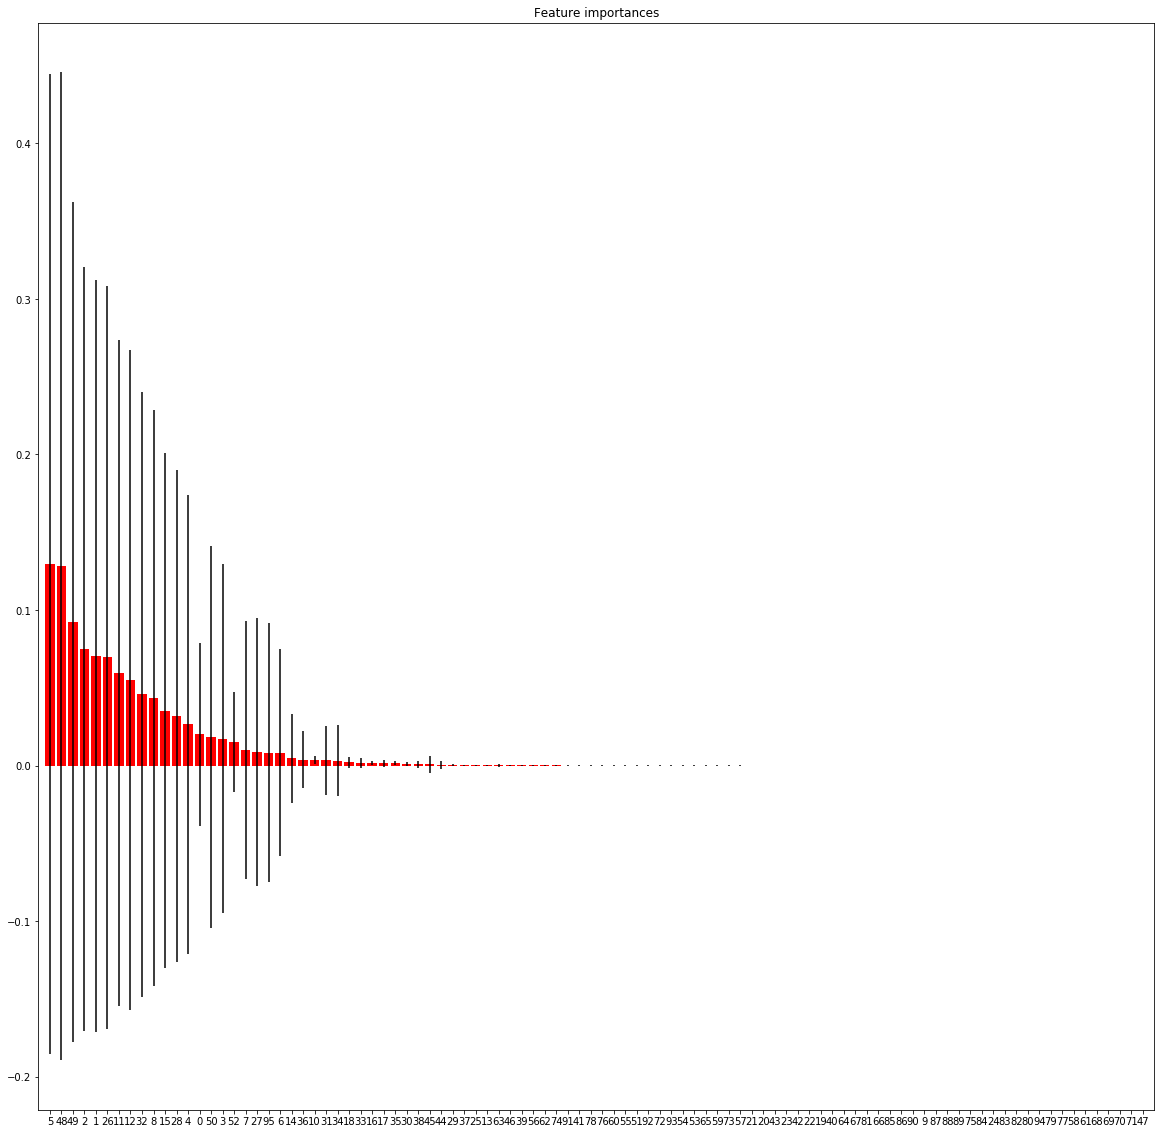

In [20]:
importances = ranFor.feature_importances_
std = np.std([tree.feature_importances_ for tree in ranFor.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X2_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20,20))
plt.title("Feature importances")
plt.bar(range(X2_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X2_train.shape[1]), indices)
plt.xlim([-1, X2_train.shape[1]])
plt.show()


In [21]:
# Compute ROC curve and ROC area for each class
n_classes = target_function_list[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y2_test[:, i], y2_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y2_test.ravel(), y2_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

NameError: name 'roc_curve' is not defined

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = tree.predict_proba(X_test)

print roc_auc_score(y_test, predict_proba[:,1])

fpr, tpr, _ = roc_curve(y_test, predictions[:,1])

plt.clf()
plot.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [22]:
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

X = copy_df
y = target_function_list
n_samples, n_features = X.shape

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Automatically created module for IPython interactive environment


KeyError: "None of [Int64Index([ 578,  579,  580,  581,  582,  583,  584,  585,  586,  587,\n            ...\n            5726, 5727, 5728, 5729, 5730, 5731, 5732, 5733, 5734, 5735],\n           dtype='int64', length=4779)] are in the [columns]"

In [23]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
X = copy_df
y = target_function_list

# Binarize the output already done
n_classes = 2

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
#Plot of a ROC curve for a specific class

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Automatically created module for IPython interactive environment


TypeError: list indices must be integers or slices, not tuple

In [ ]:
# Visualize training history

import matplotlib.pyplot as plt
import numpy
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from sklearn.cross_validation import train_test_split
from sklearn import metrics
#from sklearn.cross_validation import cross_val_score
# Import `Sequential` from `keras.models`
# Split the Data Set 
X6_train, X6_test, y6_train, y6_test = train_test_split(copy_df, target_function_list, test_size=0.3, random_state=0)
# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(len(copy_df.columns),)))

# Add one hidden layer 
model.add(Dense(15, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(50, activation='relu'))

model.add(Dense(100, activation='relu'))

model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))

model.add(Dense(100, activation='relu'))

model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))


# Add an output layer 
model.add(Dense(1, activation='tanh'))
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X6_train, y6_train,epochs=2000,validation_split=0.33, batch_size=10, verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [25]:
a_df.sample(50)

,cert_info,cert_info.authorityInfoAccess,cert_info.authorityKeyIdentifier,cert_info.basicConstraints,cert_info.certificate,cert_info.certificatePolicies,cert_info.crlDistributionPoints,cert_info.ct_precert_scts,cert_info.extendedKeyUsage,cert_info.freshestCRL,cert_info.has_expired,cert_info.issuer.C,cert_info.issuer.CN,cert_info.issuer.DC,cert_info.issuer.L,cert_info.issuer.O,cert_info.issuer.OU,cert_info.issuer.ST,cert_info.issuer.emailAddress,cert_info.issuer.houseIdentifier,cert_info.issuer.organizationIdentifier,cert_info.issuer.postalCode,cert_info.issuer.serialNumber,cert_info.issuer.street,cert_info.issuer.subjectAltName,cert_info.issuerAltName,cert_info.keyUsage,cert_info.notAfter,cert_info.notBefore,cert_info.nsCertType,cert_info.nsComment,cert_info.serialNumber,cert_info.subject.C,cert_info.subject.CN,cert_info.subject.L,cert_info.subject.O,cert_info.subject.OU,cert_info.subject.ST,cert_info.subject.businessCategory,cert_info.subject.emailAddress,cert_info.subject.jurisdictionC,cert_info.subject.jurisdictionL,cert_info.subject.jurisdictionST,cert_info.subject.organizationIdentifier,cert_info.subject.postOfficeBox,cert_info.subject.postalCode,cert_info.subject.serialNumber,cert_info.subject.street,cert_info.subject.subjectAltName,cert_info.subjectAltName,cert_info.subjectKeyIdentifier,cert_info.version,cert_validation,certificate_info,certificate_info.authorityInfoAccess,certificate_info.authorityKeyIdentifier,certificate_info.basicConstraints,certificate_info.certificate,certificate_info.certificatePolicies,certificate_info.crlDistributionPoints,certificate_info.ct_precert_scts,certificate_info.extendedKeyUsage,certificate_info.has_expired,certificate_info.issuer.C,certificate_info.issuer.CN,certificate_info.issuer.L,certificate_info.issuer.O,certificate_info.issuer.OU,certificate_info.issuer.ST,certificate_info.issuer.emailAddress,certificate_info.issuer.postalCode,certificate_info.issuer.street,certificate_info.issuerAltName,certificate_info.keyUsage,certificate_info.notAfter,certificate_info.notBefore,certificate_info.nsCertType,certificate_info.serialNumber,certificate_info.subject.C,certificate_info.subject.CN,certificate_info.subject.L,certificate_info.subject.O,certificate_info.subject.OU,certificate_info.subject.ST,certificate_info.subject.businessCategory,certificate_info.subject.emailAddress,certificate_info.subject.jurisdictionC,certificate_info.subject.jurisdictionL,certificate_info.subject.jurisdictionST,certificate_info.subject.postalCode,certificate_info.subject.serialNumber,certificate_info.subject.street,certificate_info.subjectAltName,certificate_info.subjectKeyIdentifier,certificate_info.version,indicator,success
487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OCSP - URI:http://ocsp.godaddy.com/\nCA Issuers - URI:http://certificates.godaddy.com/repository/gdig2.crt\n,keyid:40:C2:BD:27:8E:CC:34:83:30:A2:33:D7:FB:6C:B3:F0:B4:2C:80:CE\n,CA:FALSE,-----BEGIN CERTIFICATE-----\nMIIFPzCCBCegAwIBAgIJAMsaH+2yjkN/MA0GCSqGSIb3DQEBCwUAMIG0MQswCQYD\nVQQGEwJVUzEQMA4GA1UECBMHQXJpem9uYTETMBEGA1UEBxMKU2NvdHRzZGFsZTEa\nMBgGA1UEChMRR29EYWRkeS5jb20sIEluYy4xLTArBgNVBAsTJGh0dHA6Ly9jZXJ0\ncy5nb2RhZGR5LmNvbS9yZXBvc2l0b3J5LzEzMDEGA1UEAxMqR28gRGFkZHkgU2Vj\ndXJlIENlcnRpZmljYXRlIEF1dGhvcml0eSAtIEcyMB4XDTE4MDMxNzIwNDUwMloX\nDTE5MDMxNzIwNDUwMlowPzEhMB8GA1UECxMYRG9tYWluIENvbnRyb2wgVmFsaWRh\ndGVkMRowGAYDVQQDExFvbW5pLWVsZWN0cmljLmNvbTCCASIwDQYJKoZIhvcNAQEB\nBQADggEPADCCAQoCggEBAM+kbywXftK9qOJGNbTWofOfV2a4w2OB7VmVS/p62NUL\nneit18BGi1J2UcHd13BcZ/5nxY+5WrX29We3QMd9OZZVzwdCkkzXGFEHP1BibQqd\nvBBPRuB1vb+Cf9Pz+xQ2iK57g6Kl8vkuv268ir0D8//HTrVLx8KHJjizwPeNEuMs\nEoQUdI9i5QH1WgZiKGN9efXRdkz9VIQm+CilkHguUbxS03fYOsksV8I/KGSUpCPX\n8w4CwNu0KVOO/jNJRakDjHcn2336UYsAKiyLkvj6MAXGDBQ0k5y/RndaVpyujp93\n6QWN/ebNwLZ4z5uB0uLXk7ZS4SNtHkGm7Wb3EvQwsWsCAwEAAaOCAcYwggHCMAwG\nA1UdEwEB/wQCMAAwH